## 게이트가 추가된 RNN

ch 5에서 본 RNN은 순환 경로를 포함하여 과거의 정보를 기억할 수 있으며 구조가 단순하여 구현도 쉽게 할 수 있었다. 하지만 성능이 좋지 못하였는데 그 원인은 시계열 데이터에서 시간적으로 멀리 떨어진, 즉 장기 의존 관계를 잘 학습할 수 없기 때문이다.

## RNN의 문제점
RNN은 시계열 데이터의 장기 의존 관계를 학습하기 어렵다. 그 이유는 BPTT에서 기울기 소실 혹은 기울기 폭발이 일어나기 때문이다.

## RNN 복습
RNN 계층은 순환 경로를 갖고 있다. 이 순환 경로를 펼치면 밑의 그림과 같다.

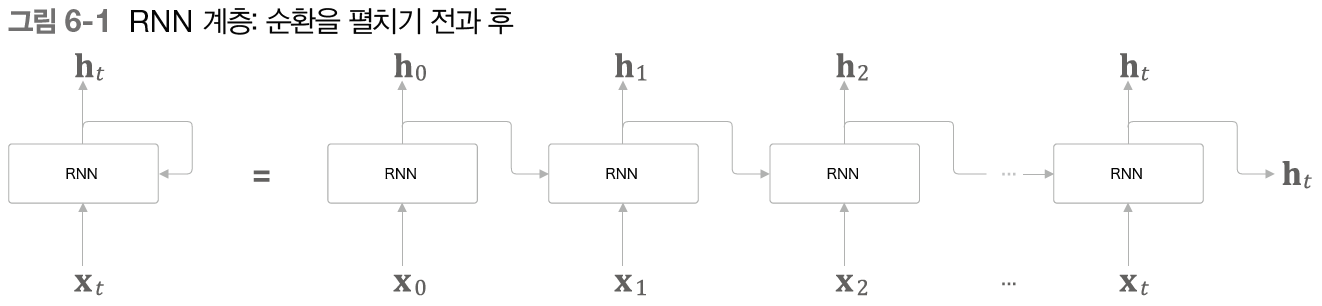

## 구조가 단순한 RNN

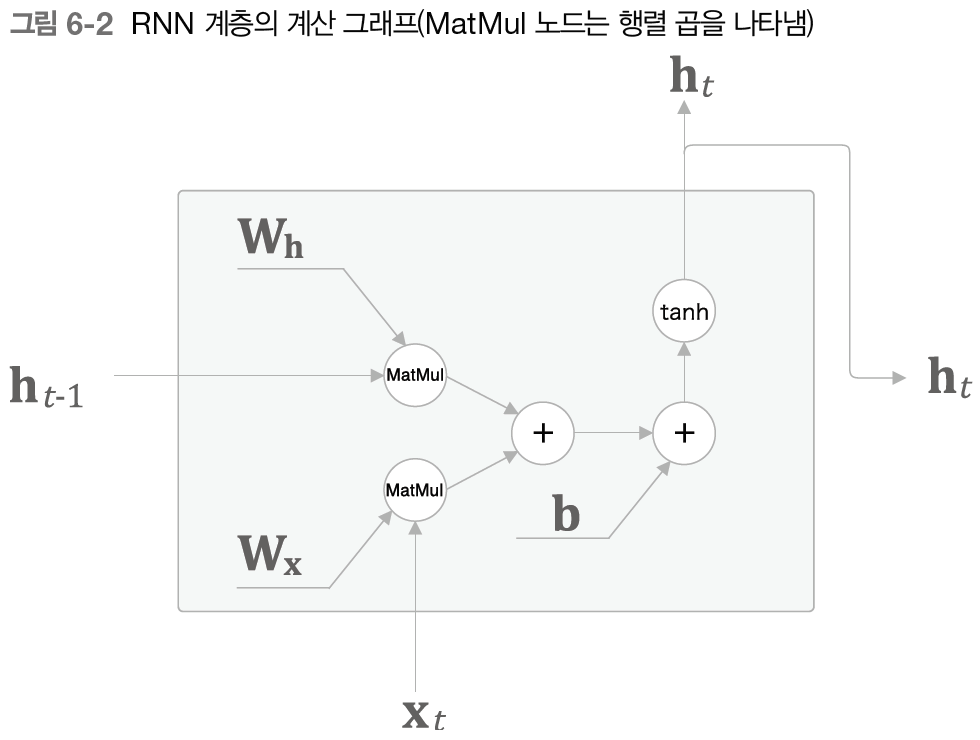

## 기울기 손실의 원인

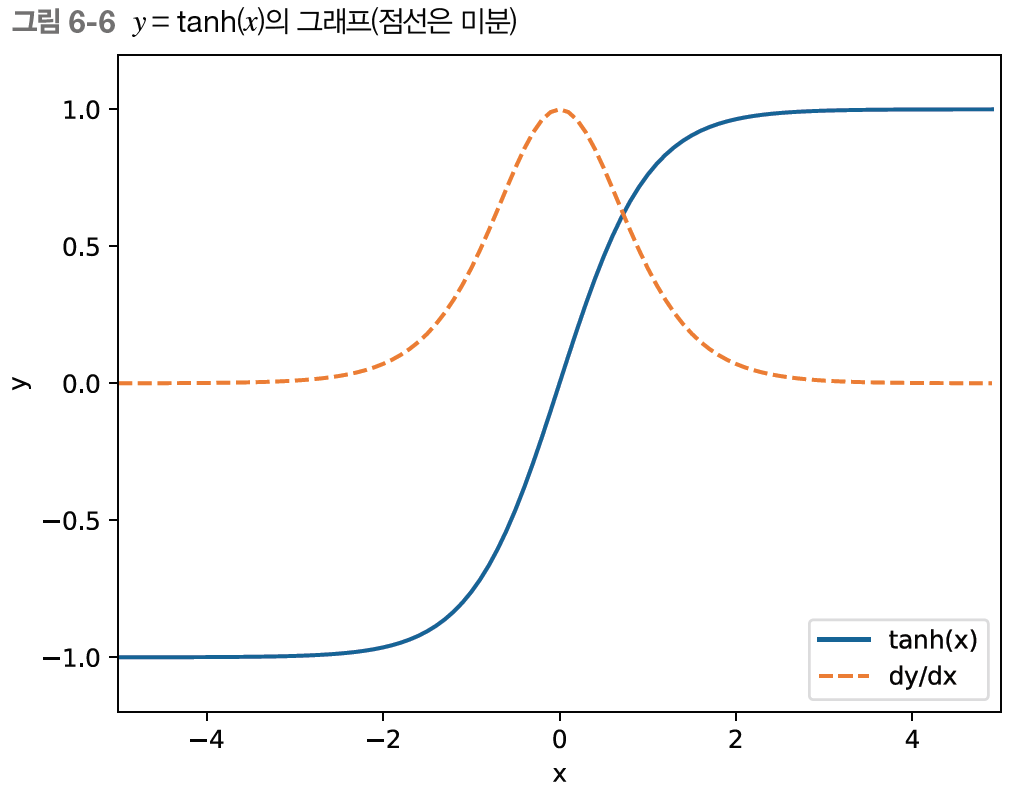

 값은 1.0 이하이며, x가 0으로부터 멀어질수록 작아진다. 즉, 역전파에서 기울기가 tanh 노드를 지날 때마다 값은 계속 작아진다는 의미이다. 그리고 tanh 함수를 T번 통과하면 기울기도 T번 반복해서 작아진다.

## 기울기 폭발의 원인
 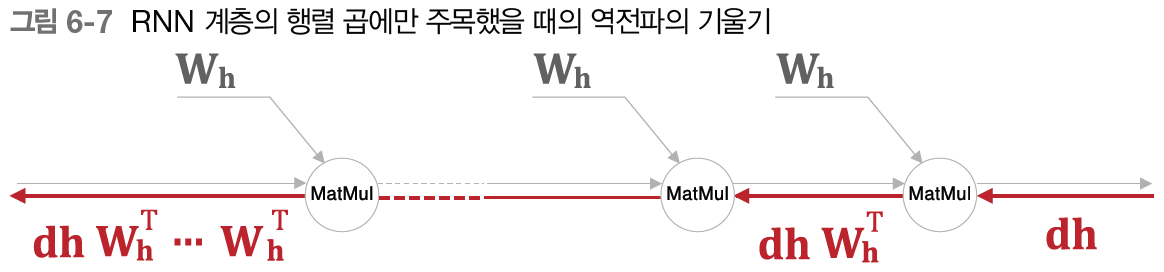

 상류로부터 dh라는 기울기가 흘러온다고 가정하고 이때 MatMul 노드에서의 역전파는 $\frac{d h}{d W_h^T}$
라는 행렬 곱으로 기울기를 계산한다. 그리고 같은 계산을 시계열 데이터의 시간 크기만큼 반복한다. 주의할 점은 행렬 곱셈에서 매번 똑같은 Wh 가중치를 쓴다는 것이다.
즉, 행렬 곱의 기울기는 시간에 비례해 지수적으로 증가/감소함을 알 수 있으며 증가할 경우 기울기 폭발이라고 한다.

## 기울기 폭발 대책
기울기 폭발 대책으로는 전통적인 기법인 기울기 클리핑이라는 기법이 있다. 기울기 클리핑은 단순하며 여기서 신경망에서 사용되는 모든 매개변수에 대한 기울기를 하나로 처리한다고 가정한다.
기울기의 L2노름이 문턱값을 초과하면 두 번째 줄의 수식과 같이 기울기를 수정하며 이를 기울기 클리핑이라 한다.

## 기울기 소실과 LSTM
RNN 학습에서 기울기 소실도 큰 문제이다. 이 문제를 해결하려면 RNN 계층의 아키텍처를 근본부터 뜯어고쳐야 한다.

## LSTM의 인터페이스
계산을 단순화하는 도법을 하나 도입하는데 아래와 같이 행렬 계산 등을 하나의 직사각형 노드로 정리해 그리는 방식이다.

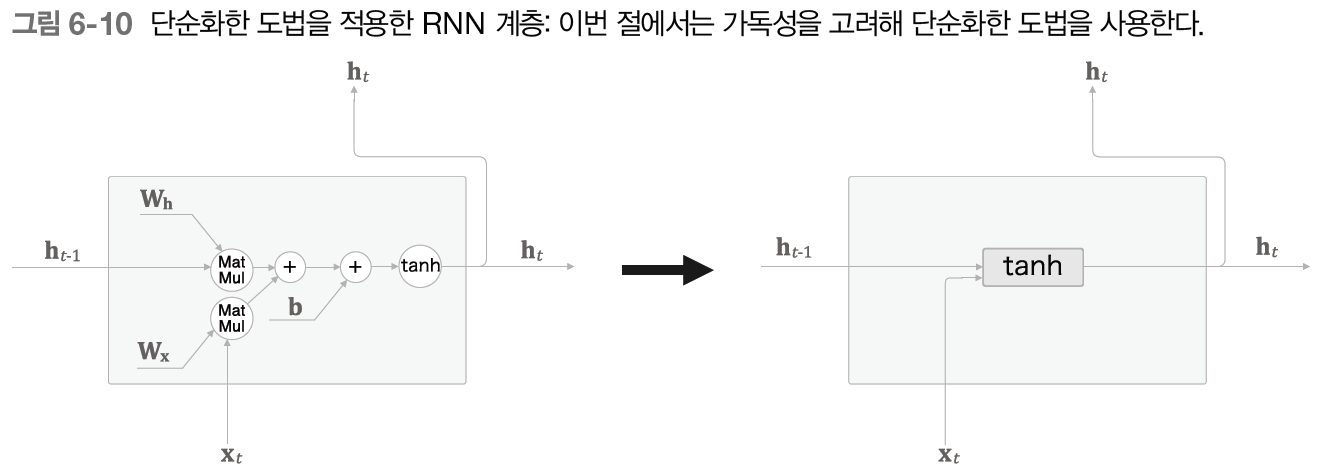
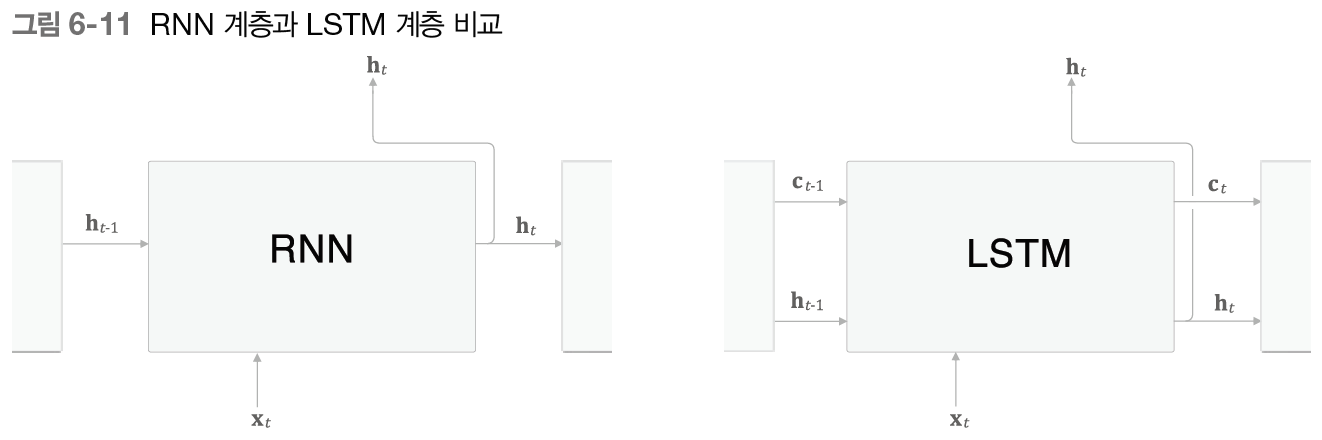

여기서 c를 기억 셀이라 하며 LSTM 전용의 기억 메커니즘이다.

기억 셀의 특징은 데이터를 LSTM 계층 내에서만 주고받는다는 것이다. 다른 계층으로는 출력하지 않는다는 것이다. 반면, LSTM의 은닉 상태 h는 RNN 계층과 마찬가지로 다른 계층, 위쪽으로 출력된다.

## LSTM 계층 조립하기
LSTM에는 기억 셀 ct가 있다. c_t에서 시각 t에서의 LSTM의 기억이 저장돼 있는데, 과거로부터 시각 t까지의 필요한 모든 정보가 저장돼 있다고 가정한다. 그리고 필요한 정보를 모두 간직한 이 기억을 바탕으로, 외부 계층에 은닉 상태 h_t를 출력한다. 이때 출력하는 h_t는 아래 그림과 같이 기억 셀의 값을 tanh함수로 변환하 값이다.

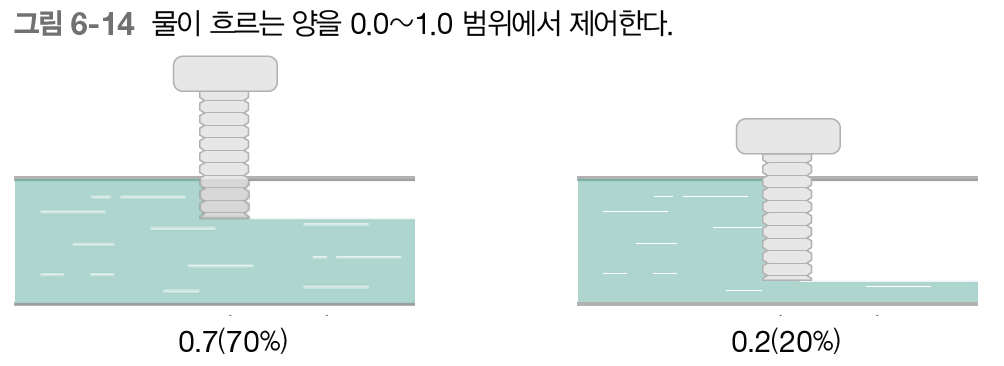

그리고 게이트의 열림 사애는 그림에서처럼 0.0~1.0 사이의 실수로 나타나며 1.0은 완전한 개방을 의미한다. 그리고 그 값이 다음으로 흐르는 물의 양을 결정한다. 여기서 중요한 것은 '게이트를 얼마나 열까'라는 것도 데이터로부터 자동으로 학습한다는 점이다.

## output 게이트
tanh(c_t)의 각 원소에 대해 '그것이 다음 시각의 은닉 상태에 얼마나 중요한가'를 조정한다. 한편, 이 게이트는 다음 은닉 상태 h_t의 출력을 담당하는 게이트이므로 output 게이트라고 한다.

output 게이트의 열림 상태는 입력 xt와 이전 상태 h(t-1)로부터 구한다. 이때의 식은 밑에 식과 같다.

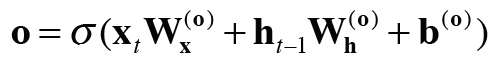

밑에 그림에서 output 게이트에서 수행하는 식의 계산을 sigma로 표기했다. sigma의 출력을 o라고 하면 h_t는 o와 tanh(c_t)의 곱으로 계산된다.

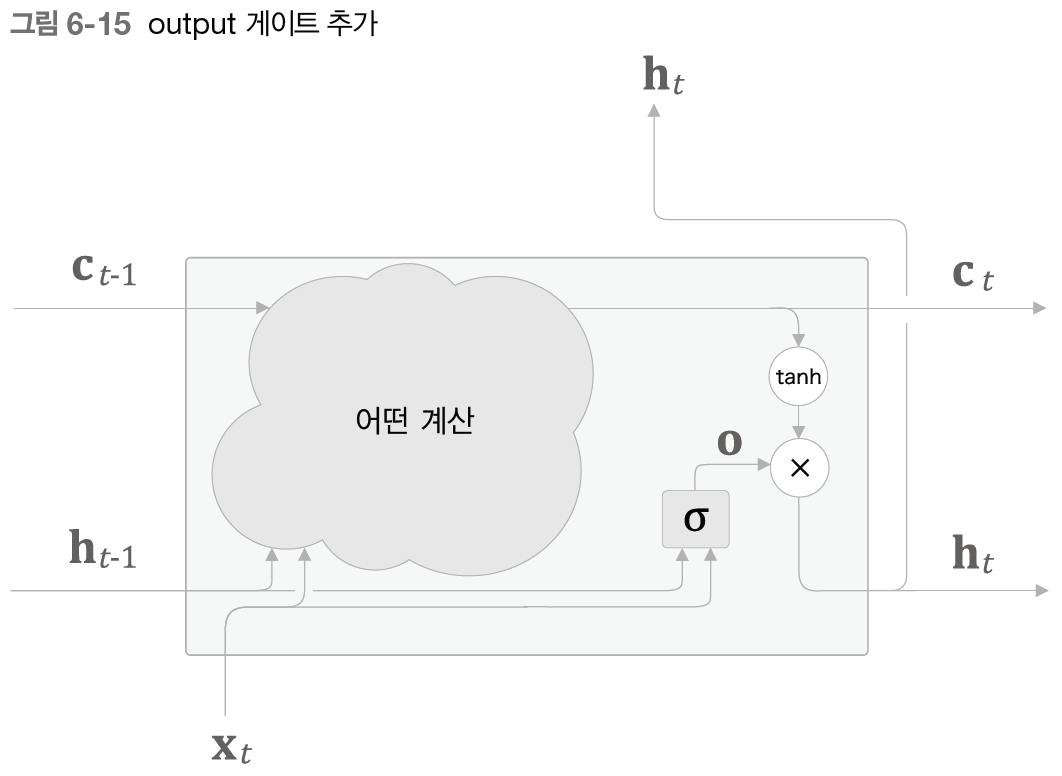
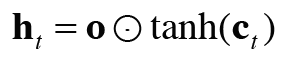


## forget 게이트
다음에 해야 할 일은 기억 셀에 '무엇을 잊을까'를 명확하게 지시하는 것이다.

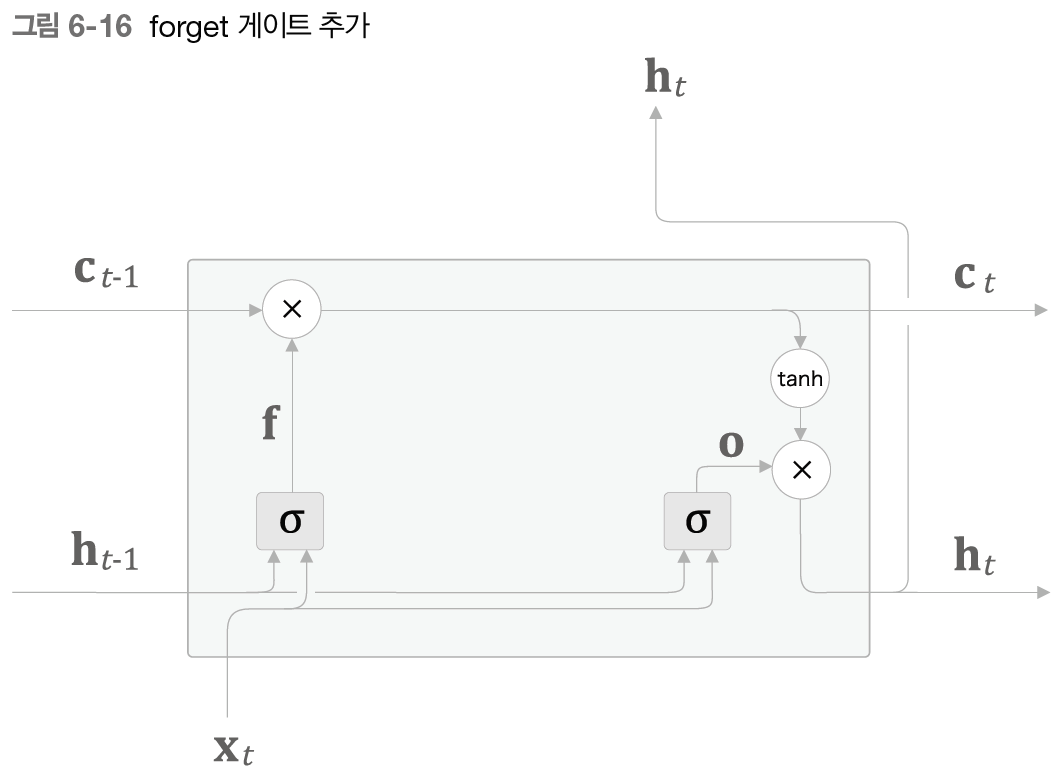
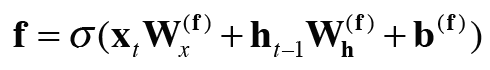

## 새로운 기억 셀
forget 게이트를 거치며넛 이전 시각의 기억 셀로부터 잊어야 할 기억이 삭제되었다.

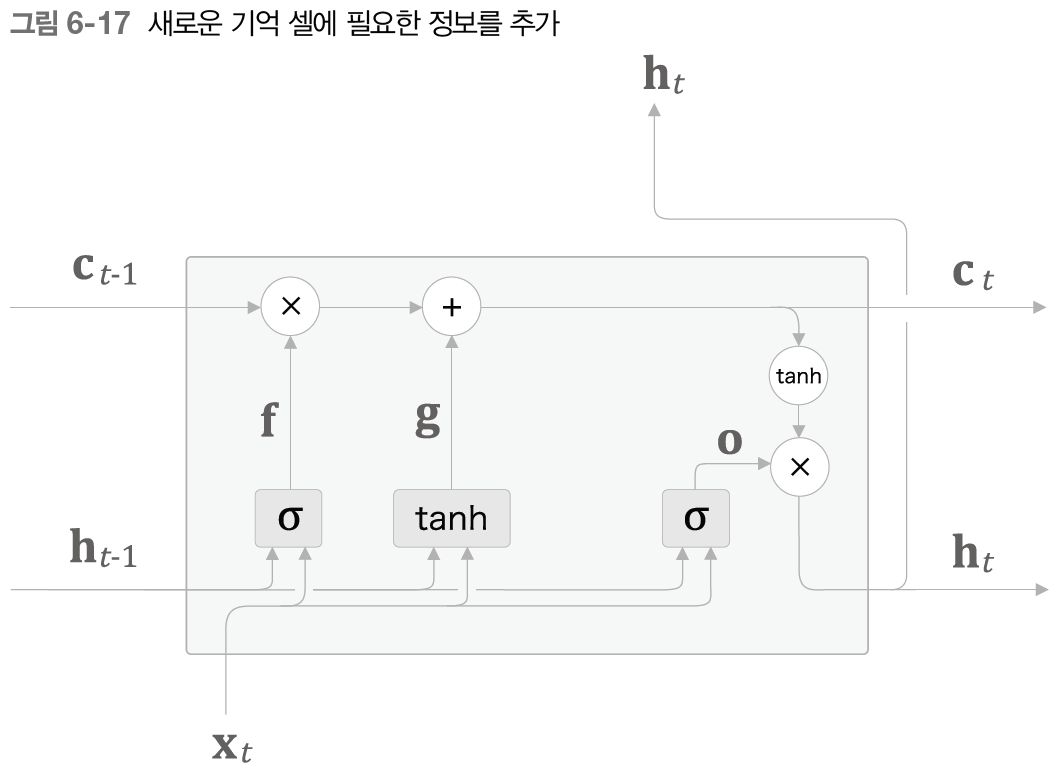

그림에서 보듯 tanh 노드가 계산한 결과가 이전 시각의 기억 셀 c_(t-1)에 더해진다. 기억 셀에 새로운 '정보'가 추가 된 것이다. 이 tanh노드에서 수행하는 계산은 다음과 같다.

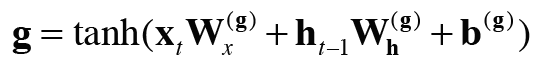

## input 게이트
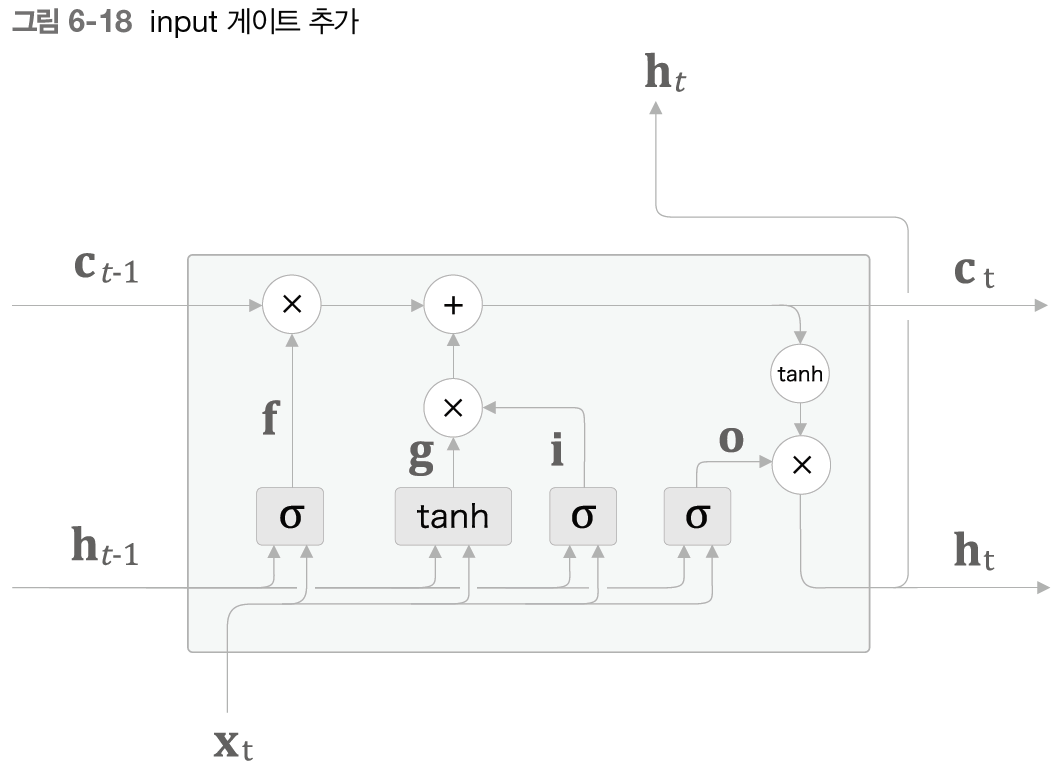
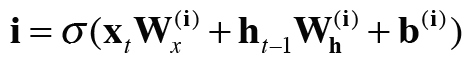

## LSTM

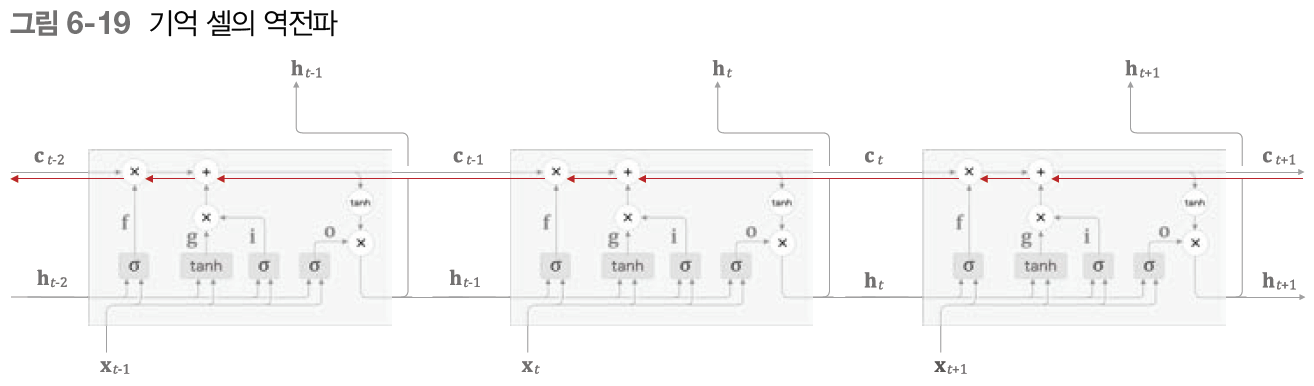

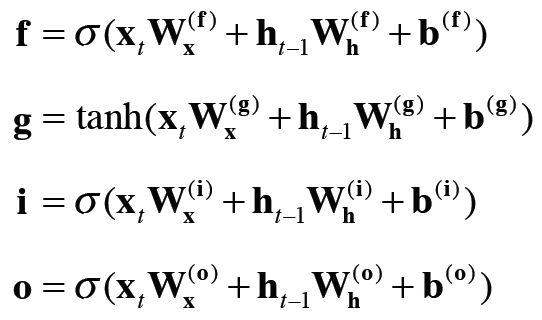

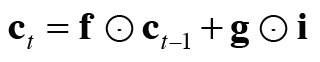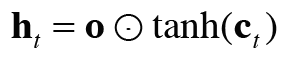

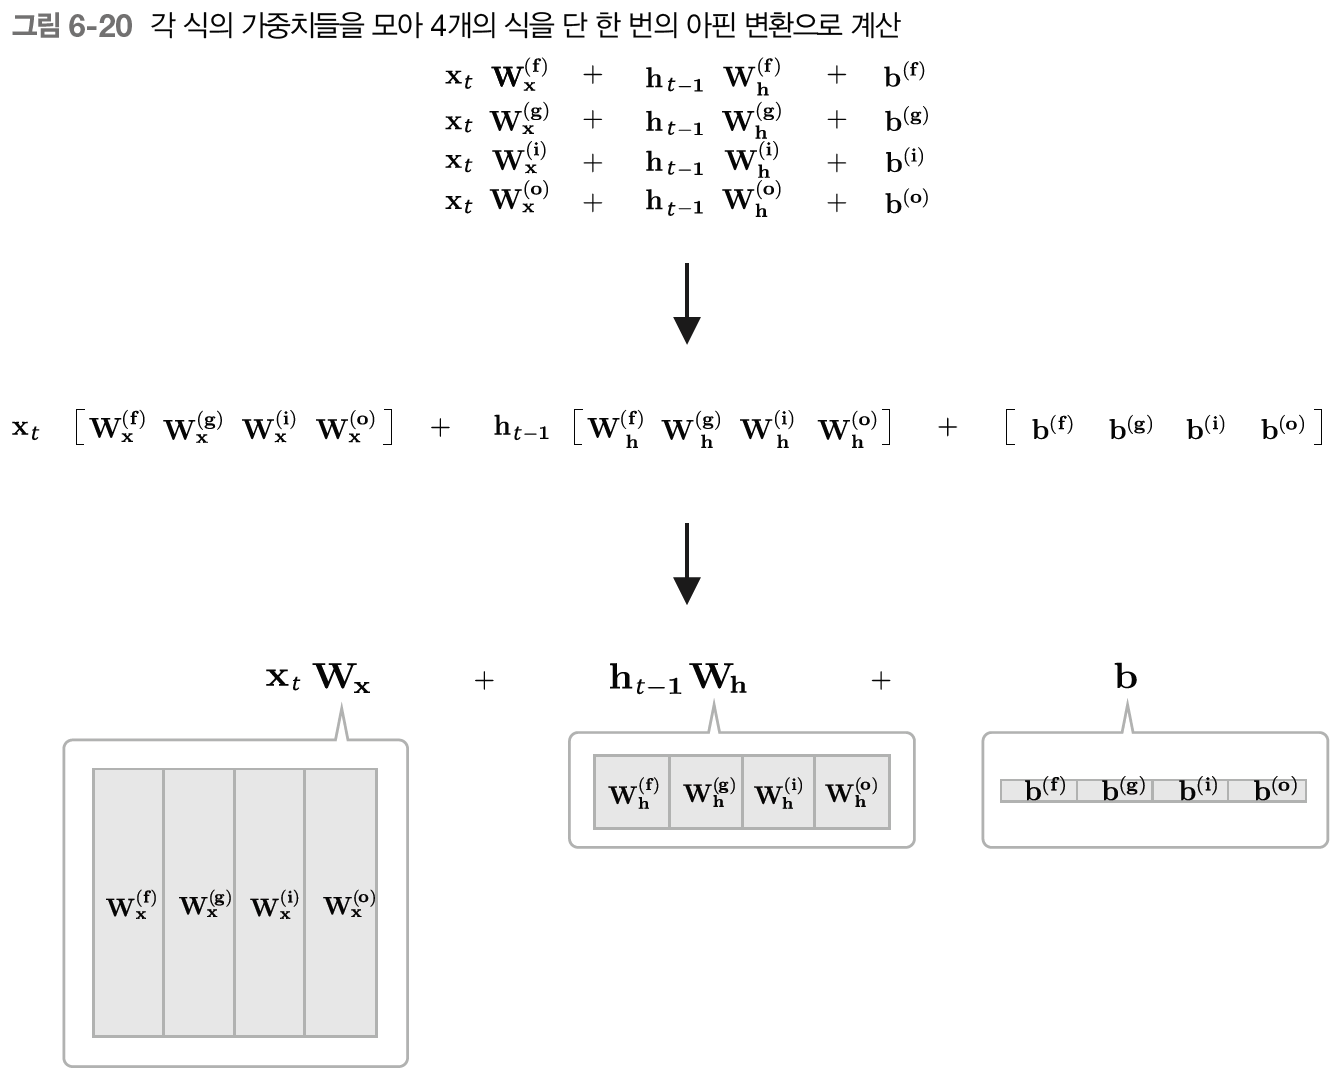

4개의 가중치를 하나로 모을 수 있고, 그렇게 하면 원래 개별적으로 총 4번 수행하던 아핀 변환을 단 1회의 게산으로 끝마칠 수 있다.

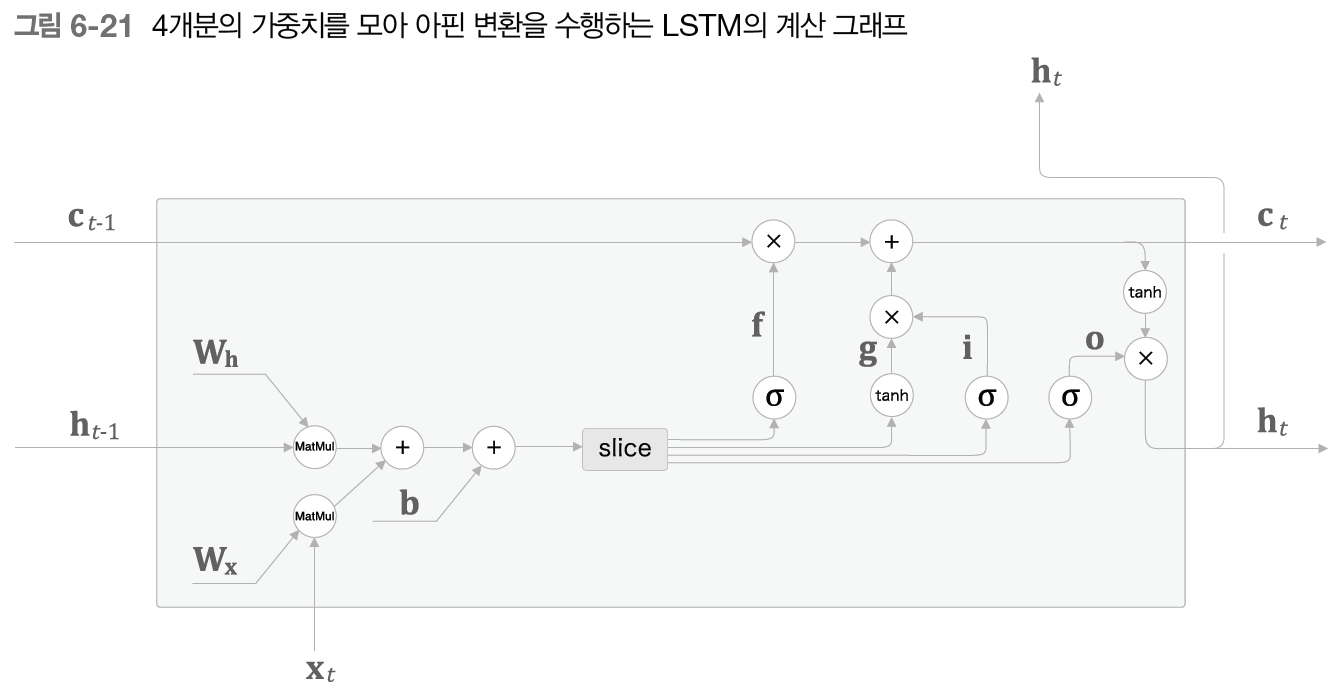

In [1]:
import numpy as np

class Sigmoid:
    """
    시그모이드 활성화 함수 계층. 순전파 시 입력 데이터를 시그모이드 함수로 변환하고,
    역전파 시 기울기를 계산한다.

    Attributes
    ----------
    params : list
        가중치가 없는 계층이므로 빈 리스트
    grads : list
        기울기 계산이 없으므로 빈 리스트
    out : numpy.ndarray
        순전파에서 계산된 출력값을 저장
    
    Methods
    -------
    forward(x)
        입력 데이터에 대해 시그모이드 함수 계산
    backward(dout)
        역전파를 수행하여 입력 데이터에 대한 기울기 계산
    """

    def __init__(self):
        """
        Sigmoid 클래스의 초기화 메서드.

        예시:
        >>> sigmoid_layer = Sigmoid()
        """
        self.params, self.grads = [], []
        self.out = None

    def forward(self, x):
        """
        순전파 수행. 입력 데이터를 시그모이드 함수를 통해 변환.

        Parameters
        ----------
        x : numpy.ndarray
            입력 데이터 (배열 형태)

        Returns
        -------
        numpy.ndarray
            시그모이드 함수가 적용된 출력 데이터

        예시:
        >>> x = np.array([0.5, -1.0, 2.0])  # 입력 데이터
        >>> sigmoid_layer = Sigmoid()  # Sigmoid 계층 생성
        >>> out = sigmoid_layer.forward(x)  # 순전파 수행
        >>> print(out)  # 시그모이드 출력 값
        """
        out = 1 / (1 + np.exp(-x))
        self.out = out
        return out

    def backward(self, dout):
        """
        역전파 수행. 시그모이드 함수의 기울기를 계산.

        Parameters
        ----------
        dout : numpy.ndarray
            상위 계층에서 전해지는 기울기

        Returns
        -------
        numpy.ndarray
            입력 데이터에 대한 기울기

        예시:
        >>> dout = np.array([0.1, 0.2, 0.3])  # 기울기
        >>> dx = sigmoid_layer.backward(dout)  # 역전파 수행
        >>> print(dx)  # 입력 데이터에 대한 기울기 출력
        """
        dx = dout * (1.0 - self.out) * self.out
        return dx


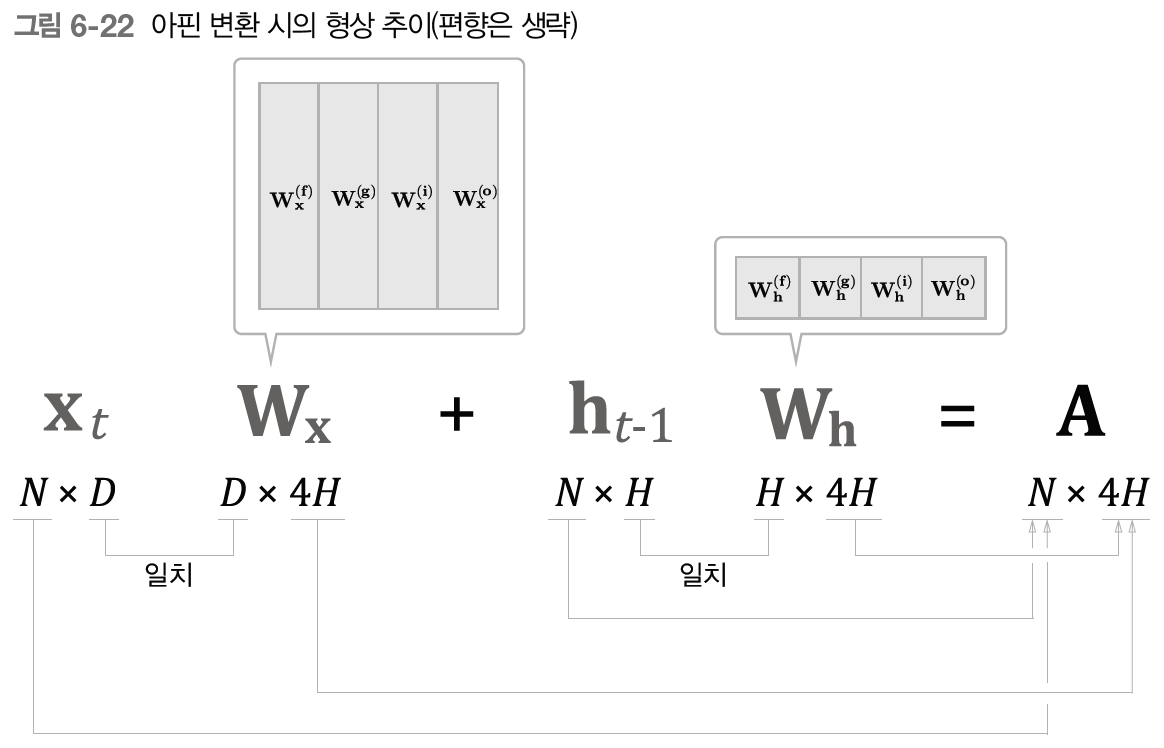

[그림 6-22]에서는 미니배치 수를 N, 입력 데이터의 차원 수를 D, 기억 셀과 은닉 상태의 차원 수를 모두 H로 표시했습니다. 그리고 계산 결과인 A에는 네 개분의 아핀 변환 결과가 저장된다. 따라서 결과로 데이터를 꺼낼 때는 슬라이스 해서 꺼내고 꺼낸 데이터를 다음 연산 노드에 분배한다.

slice 노드는 행렬을 네 조각으로 나눠서 분배했다. 따라서 그 역전파에서는 반대로 4개의 기울기를 결합해야 한다.

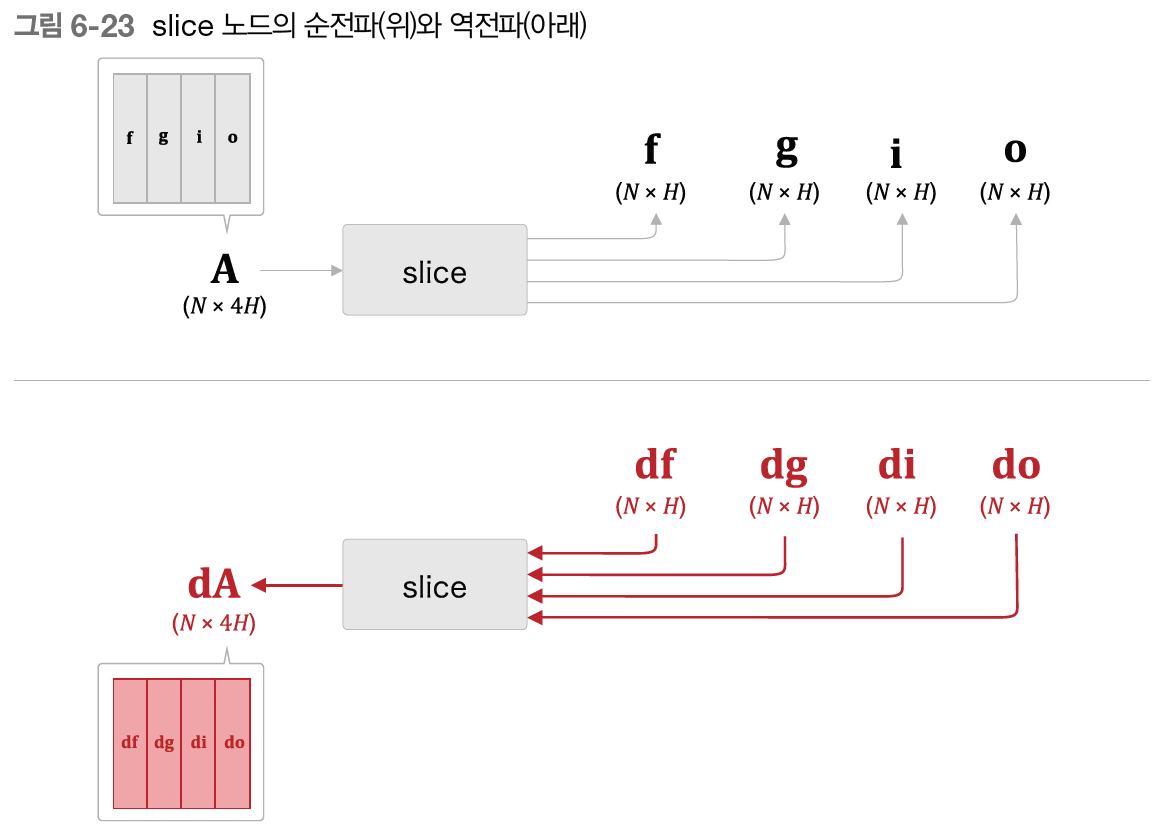

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [7]:
import numpy as np

class LSTM:
    """
    LSTM 계층. 순전파에서는 LSTM 셀을 통해 데이터를 처리하고,
    역전파에서는 기울기를 계산한다.

    Attributes
    ----------
    params : list
        가중치 Wx, Wh, 편향 b를 포함한 리스트
    grads : list
        Wx, Wh, b에 대한 기울기 리스트
    cache : tuple
        순전파에서 저장된 값을 캐시로 보관하여 역전파에 사용
    
    Methods
    -------
    forward(x, h_prev, c_prev)
        입력 데이터와 이전 은닉 상태, 이전 셀 상태를 받아서 다음 은닉 상태와 셀 상태를 계산
    backward(dh_next, dc_next)
        역전파를 수행하여 입력 데이터, 이전 은닉 상태, 이전 셀 상태에 대한 기울기를 계산
    """
    
    def __init__(self, Wx, Wh, b):
        """
        LSTM 클래스 초기화 메서드.

        Parameters
        ----------
        Wx : numpy.ndarray
            입력 데이터 x에 대한 가중치 (4개 분할된 가중치)
        Wh : numpy.ndarray
            은닉 상태 h에 대한 가중치 (4개 분할된 가중치)
        b : numpy.ndarray
            편향 (4개 분할된 편향)

        예시:
        >>> Wx = np.random.randn(10, 40)  # 입력 가중치
        >>> Wh = np.random.randn(40, 40)  # 은닉 상태 가중치
        >>> b = np.random.randn(40)  # 편향
        >>> lstm_layer = LSTM(Wx, Wh, b)  # LSTM 계층 생성
        """
        self.params = [Wx, Wh, b]  
        self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)]
        self.cache = None

    def forward(self, x, h_prev, c_prev):
        """
        순전파 메서드. LSTM 계층의 순전파를 계산.

        Parameters
        ----------
        x : numpy.ndarray
            입력 데이터 (N x D 형태)
        h_prev : numpy.ndarray
            이전 은닉 상태 (N x H 형태)
        c_prev : numpy.ndarray
            이전 셀 상태 (N x H 형태)

        Returns
        -------
        h_next : numpy.ndarray
            다음 은닉 상태 (N x H 형태)
        c_next : numpy.ndarray
            다음 셀 상태 (N x H 형태)

        예시:
        >>> x = np.random.randn(2, 10)  # 입력 데이터
        >>> h_prev = np.random.randn(2, 40)  # 이전 은닉 상태
        >>> c_prev = np.random.randn(2, 40)  # 이전 셀 상태
        >>> h_next, c_next = lstm_layer.forward(x, h_prev, c_prev)  # 순전파 수행
        >>> print(h_next)  # 다음 은닉 상태 출력
        >>> print(c_next)  # 다음 셀 상태 출력
        """
        Wx, Wh, b = self.params
        N, H = h_prev.shape

        # LSTM 활성화 값 계산
        A = np.dot(x, Wx) + np.dot(h_prev, Wh) + b

        # 활성화 값 분할 (forget, cell, input, output 게이트)
        f = A[:, :H]
        g = A[:, H:2*H]
        i = A[:, 2*H:3*H]
        o = A[:, 3*H:]

        # 게이트 함수 적용
        f = sigmoid(f)
        g = np.tanh(g)
        i = sigmoid(i)
        o = sigmoid(o)

        # 다음 셀 상태 및 은닉 상태 계산
        c_next = f * c_prev + g * i
        h_next = o * np.tanh(c_next)

        # 순전파 캐시 저장
        self.cache = (x, h_prev, c_prev, i, f, g, o, c_next)

        return h_next, c_next

    def backward(self, dh_next, dc_next):
        """
        역전파 메서드. LSTM 계층의 역전파를 계산.

        Parameters
        ----------
        dh_next : numpy.ndarray
            다음 은닉 상태의 기울기 (N x H 형태)
        dc_next : numpy.ndarray
            다음 셀 상태의 기울기 (N x H 형태)

        Returns
        -------
        dx : numpy.ndarray
            입력 데이터에 대한 기울기 (N x D 형태)
        dh_prev : numpy.ndarray
            이전 은닉 상태에 대한 기울기 (N x H 형태)
        dc_prev : numpy.ndarray
            이전 셀 상태에 대한 기울기 (N x H 형태)

        예시:
        >>> dh_next = np.random.randn(2, 40)  # 다음 은닉 상태의 기울기
        >>> dc_next = np.random.randn(2, 40)  # 다음 셀 상태의 기울기
        >>> dx, dh_prev, dc_prev = lstm_layer.backward(dh_next, dc_next)  # 역전파 수행
        >>> print(dx)  # 입력 데이터에 대한 기울기 출력
        >>> print(dh_prev)  # 이전 은닉 상태에 대한 기울기 출력
        >>> print(dc_prev)  # 이전 셀 상태에 대한 기울기 출력
        """
        Wx, Wh, b = self.params
        x, h_prev, c_prev, i, f, g, o, c_next = self.cache

        tanh_c_next = np.tanh(c_next)

        # 셀 상태의 기울기 계산
        ds = dc_next + (dh_next * o) * (1 - tanh_c_next ** 2)

        # 각 게이트와 관련된 기울기 계산
        di = ds * g
        df = ds * c_prev
        do = dh_next * tanh_c_next
        dg = ds * i

        di *= i * (1 - i)
        df *= f * (1 - f)
        do *= o * (1 - o)
        dg *= (1 - g ** 2)

        dA = np.hstack((df, dg, di, do))

        dWh = np.dot(h_prev.T, dA)
        dWx = np.dot(x.T, dA)
        db = dA.sum(axis=0)

        self.grads[0][...] = dWx
        self.grads[1][...] = dWh
        self.grads[2][...] = db

        dx = np.dot(dA, Wx.T)
        dh_prev = np.dot(dA, Wh.T)

        return dx, dh_prev, dc_prev


In [2]:
import numpy as np
from collections import defaultdict

# defaultdict을 생성하고, 각 요소를 저장
data = defaultdict(lambda: np.random.randn(5, 4 * 5))

# 각 키에 대한 배열을 생성하여 저장
data['df'] = np.random.randn(5, 5)
data['dg'] = np.random.randn(5, 5)
data['di'] = np.random.randn(5, 5)
data['do'] = np.random.randn(5, 5)

# 각 배열을 hstack을 통해 가로로 쌓기
result = np.hstack((data['df'], data['dg'], data['di'], data['do']))

print("Resulting Array:")
print(result)


Resulting Array:
[[-0.14360228 -0.23000421 -0.35506281  0.43684913  0.02028362 -2.20318535
   1.81506316  1.27531625 -1.63005406 -0.07979187  0.01866337 -1.0739821
   0.6923424   0.13357108 -0.64478396 -0.65425164 -0.14014175 -0.04757364
   0.29691149 -0.39659075]
 [-0.65494951  0.62831633 -0.14087247 -1.99393984  0.23846507  0.84387065
  -0.71363886 -0.54743954 -1.45648962 -0.81048422 -2.31978216  0.8560661
   0.74238529 -1.08084151 -1.03011334 -0.23428584 -2.6009382  -1.25696828
   0.69788943  1.05525864]
 [-0.60402392 -0.9471281  -0.04801906  0.64698746  0.68653795  0.91354477
   0.75053768 -0.59569501 -1.26338433 -0.13161931 -0.73144989 -0.33981584
   0.20084468 -1.66200207  0.58732023 -0.05258971  0.87546406  1.22928457
   0.70524912  0.51681949]
 [ 0.47170771  1.02688083  0.05930611 -1.41601651  0.81092583 -1.16119308
  -1.94887914 -0.22304042 -0.0466519  -0.34547468 -1.84432047 -1.76755929
   0.124692   -0.89490084 -1.15878872 -2.1015697   0.75442131  0.76140259
   0.10782475 -0

In [1]:
import numpy as np

# 하이퍼파라미터 설정
N, D, H = 3, 4, 5  # N: 배치 크기, D: 입력 벡터 차원, H: 은닉 상태 차원
Wx = np.random.randn(D, 4 * H)  # 입력 가중치 (D x 4H)
Wh = np.random.randn(H, 4 * H)  # 은닉 상태 가중치 (H x 4H)
b = np.random.randn(4 * H)  # 편향 (4H)


Wx.shape,Wh.shape,b.shape

((4, 20), (5, 20), (20,))

In [10]:
# LSTM 초기화
lstm = LSTM(Wx, Wh, b)

# 입력 데이터 생성
x = np.random.randn(N, D)  # 입력 (N x D)
h_prev = np.random.randn(N, H)  # 이전 은닉 상태 (N x H)
c_prev = np.random.randn(N, H)  # 이전 셀 상태 (N x H)

# 순전파 계산
h_next, c_next = lstm.forward(x, h_prev, c_prev)

print("다음 은닉 상태 (h_next):","\n", h_next)
print("다음 셀 상태 (c_next):","\n", c_next)

다음 은닉 상태 (h_next): 
 [[-0.1004285  -0.43295725 -0.1247574   0.06374351  0.03775751]
 [-0.04121837  0.00976492  0.95439264  0.19674225 -0.15360642]
 [ 0.33685709  0.08694044 -0.4499405   0.0888786   0.1609629 ]]
다음 셀 상태 (c_next): 
 [[-0.10205025 -1.102314   -0.16393218  0.50199098  0.03865559]
 [-0.0448264   0.43214075  2.44603153  0.79024536 -0.29110468]
 [ 0.53867394  0.5949771  -0.80015749  0.27649962  0.18132937]]


In [11]:
# 역전파 계산 (임의의 그래디언트)
dh_next = np.random.randn(N, H)  # 다음 은닉 상태의 그래디언트
dc_next = np.random.randn(N, H)  # 다음 셀 상태의 그래디언트

dx, dh_prev, dc_prev = lstm.backward(dh_next, dc_next)

print("입력 x에 대한 그래디언트 (dx):", dx"\n",)
print("이전 은닉 상태에 대한 그래디언트 (dh_prev):", dh_prev)
print("이전 셀 상태에 대한 그래디언트 (dc_prev):", dc_prev)

SyntaxError: invalid syntax (3559320261.py, line 7)

## Time LSTM 구현

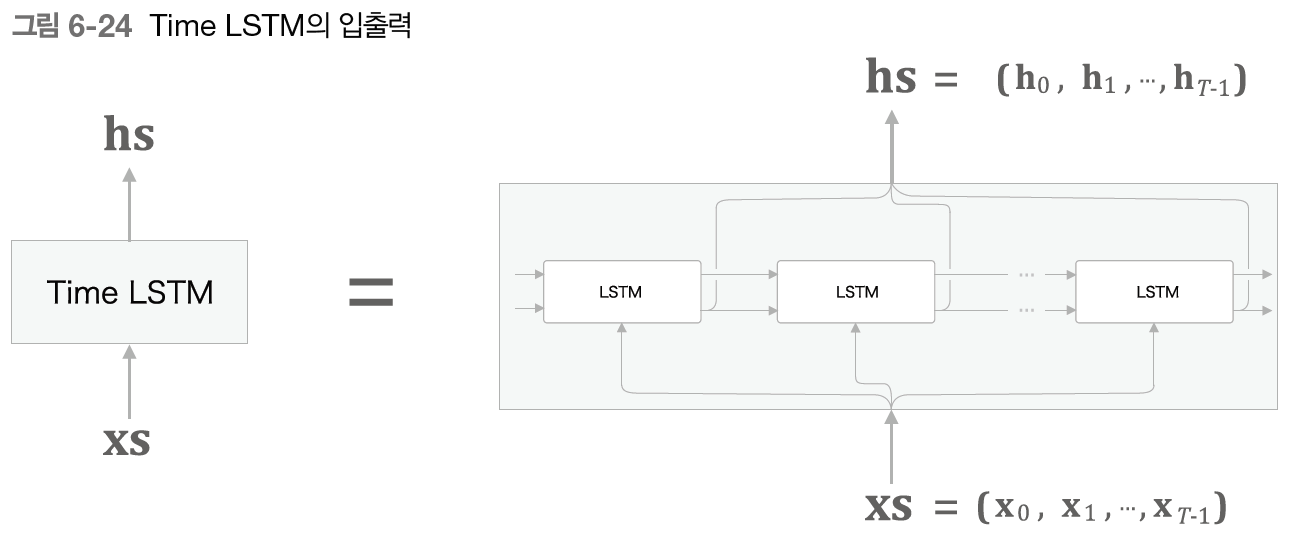
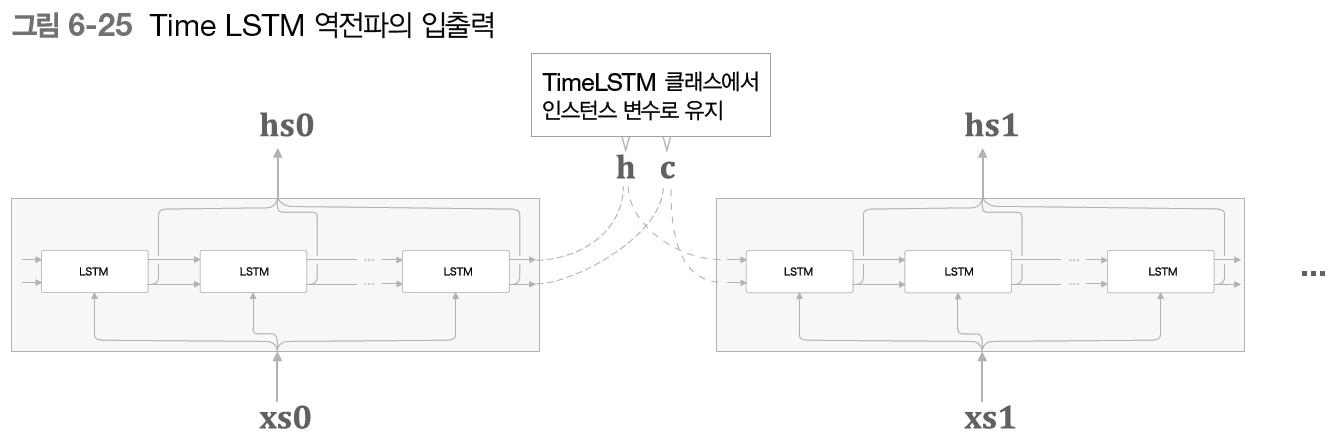

In [12]:
class TimeLSTM:
    """
    시간 축을 따라 LSTM을 적용하는 TimeLSTM 계층. 
    다수의 시퀀스 데이터를 처리하며, 순전파 및 역전파를 수행할 수 있다.
    
    Attributes
    ----------
    params : list
        LSTM 계층의 가중치와 편향을 포함한 리스트
    grads : list
        각 가중치에 대한 기울기를 저장하는 리스트
    layers : list
        각 타임스텝마다의 LSTM 계층을 저장
    h : numpy.ndarray
        은닉 상태를 저장
    c : numpy.ndarray
        셀 상태를 저장
    dh : numpy.ndarray
        은닉 상태의 기울기
    stateful : bool
        LSTM의 상태를 유지할지 여부를 나타내는 플래그
    
    Methods
    -------
    forward(xs)
        시퀀스 데이터를 받아 순전파를 수행하여 은닉 상태를 반환
    backward(dhs)
        시퀀스에 대한 은닉 상태의 기울기를 받아 역전파 수행
    set_state(h, c=None)
        은닉 상태와 셀 상태를 설정
    reset_state()
        은닉 상태와 셀 상태를 초기화
    """
    
    def __init__(self, Wx, Wh, b, stateful=False):
        """
        TimeLSTM 클래스 초기화 메서드.

        Parameters
        ----------
        Wx : numpy.ndarray
            입력 데이터에 대한 가중치 (4개 분할된 가중치)
        Wh : numpy.ndarray
            은닉 상태에 대한 가중치 (4개 분할된 가중치)
        b : numpy.ndarray
            편향 (4개 분할된 편향)
        stateful : bool, optional
            LSTM의 은닉 상태를 유지할지 여부 (기본값은 False)

        예시:
        >>> Wx = np.random.randn(10, 40)
        >>> Wh = np.random.randn(40, 40)
        >>> b = np.random.randn(40)
        >>> timelstm = TimeLSTM(Wx, Wh, b, stateful=True)
        """
        self.params = [Wx, Wh, b]
        self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)]
        self.layers = None

        self.h, self.c = None, None
        self.dh = None
        self.stateful = stateful

    def forward(self, xs):
        """
        순전파 메서드. 시퀀스 데이터를 받아 LSTM 순전파를 수행.

        Parameters
        ----------
        xs : numpy.ndarray
            입력 데이터 (N, T, D) 형태로 주어진 시퀀스 데이터

        Returns
        -------
        hs : numpy.ndarray
            은닉 상태의 시퀀스 출력 (N, T, H) 형태

        예시:
        >>> xs = np.random.randn(2, 5, 10)  # (배치 크기 N, 시간 T, 입력 차원 D)
        >>> hs = timelstm.forward(xs)  # 순전파 수행
        >>> print(hs.shape)  # (2, 5, 40) 형태의 출력
        """
        Wx, Wh, b = self.params
        N, T, D = xs.shape
        H = Wh.shape[0]

        self.layers = []
        hs = np.empty((N, T, H), dtype='f')

        if not self.stateful or self.h is None:
            self.h = np.zeros((N, H), dtype='f')
        if not self.stateful or self.c is None:
            self.c = np.zeros((N, H), dtype='f')

        for t in range(T):
            layer = LSTM(*self.params)
            self.h, self.c = layer.forward(xs[:, t, :], self.h, self.c)
            hs[:, t, :] = self.h

            self.layers.append(layer)

        return hs

    def backward(self, dhs):
        """
        역전파 메서드. 시퀀스 데이터를 받아 LSTM 역전파를 수행.

        Parameters
        ----------
        dhs : numpy.ndarray
            은닉 상태의 기울기 시퀀스 (N, T, H) 형태

        Returns
        -------
        dxs : numpy.ndarray
            입력 데이터에 대한 기울기 (N, T, D) 형태

        예시:
        >>> dhs = np.random.randn(2, 5, 40)  # 은닉 상태의 기울기
        >>> dxs = timelstm.backward(dhs)  # 역전파 수행
        >>> print(dxs.shape)  # (2, 5, 10) 형태의 입력 기울기 출력
        """
        Wx, Wh, b = self.params
        N, T, H = dhs.shape
        D = Wx.shape[0]

        dxs = np.empty((N, T, D), dtype='f')
        dh, dc = 0, 0

        grads = [0, 0, 0]
        for t in reversed(range(T)):
            layer = self.layers[t]
            dx, dh, dc = layer.backward(dhs[:, t, :] + dh, dc)
            dxs[:, t, :] = dx
            for i, grad in enumerate(layer.grads):
                grads[i] += grad

        for i, grad in enumerate(grads):
            self.grads[i][...] = grad
        self.dh = dh
        return dxs

    def set_state(self, h, c=None):
        """
        LSTM의 은닉 상태와 셀 상태를 설정하는 메서드.

        Parameters
        ----------
        h : numpy.ndarray
            은닉 상태 (N, H) 형태
        c : numpy.ndarray, optional
            셀 상태 (N, H) 형태 (기본값은 None)

        예시:
        >>> h = np.random.randn(2, 40)
        >>> c = np.random.randn(2, 40)
        >>> timelstm.set_state(h, c)
        """
        self.h, self.c = h, c

    def reset_state(self):
        """
        LSTM의 은닉 상태와 셀 상태를 초기화하는 메서드.

        예시:
        >>> timelstm.reset_state()
        """
        self.h, self.c = None, None


In [13]:
class Embedding:
    def __init__(self, W):
        """
        Embedding 클래스 초기화 함수.

        W: 임베딩 가중치 (weights)

        예시:
        >>> W = np.array([[0.1, 0.2], [0.3, 0.4], [0.5, 0.6]])  # 가중치 초기화
        >>> embedding = Embedding(W)
        """
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.idx = None

    def forward(self, idx):
        """
        순전파 함수. 주어진 인덱스를 이용해 임베딩을 가져옴.

        idx: 입력 인덱스

        예시:
        >>> idx = np.array([0, 2])  # 인덱스 입력
        >>> out = embedding.forward(idx)
        >>> print(out)  # W의 0번 및 2번 인덱스의 임베딩 출력
        [[0.1 0.2]
         [0.5 0.6]]
        """
        W, = self.params
        self.idx = idx
        out = W[idx]
        return out

    def backward(self, dout):
        """
        역전파 함수. 임베딩의 기울기를 계산.

        dout: 다음 레이어로 전달될 기울기

        예시:
        >>> dout = np.array([[1.0, 0.0], [0.0, 1.0]])  # 기울기 입력
        >>> embedding.backward(dout)  # 기울기 역전파
        >>> print(embedding.grads[0])  # W의 기울기 출력
        [[1. 0.]
         [0. 0.]
         [0. 1.]]
        """
        dW, = self.grads
        dW[...] = 0
        np.add.at(dW, self.idx, dout)
        return None


In [16]:
class TimeEmbedding:
    def __init__(self, W):
        """
        TimeEmbedding 클래스 초기화 메서드.

        :param W: 임베딩 가중치 행렬 (V x D)

        예시:
        >>> W = np.array([[0.1, 0.2], [0.3, 0.4], [0.5, 0.6]])  # 임베딩 가중치 행렬 초기화
        >>> time_embedding = TimeEmbedding(W)  # TimeEmbedding 객체 생성
        """
        self.params = [W]  # 가중치 행렬을 params 리스트에 저장
        self.grads = [np.zeros_like(W)]  # 가중치의 그래디언트를 0으로 초기화하여 grads 리스트에 저장
        self.layers = None  # 각 시간 스텝의 Embedding 레이어를 저장할 변수 초기화
        self.W = W  # 임베딩 가중치 저장

    def forward(self, xs):
        """
        순전파 메서드 (forward propagation).

        :param xs: 입력 데이터 (N x T) 형태, N: 배치 크기, T: 시간 스텝 수
        :return: 임베딩된 출력 (N x T x D)

        예시:
        >>> xs = np.array([[0, 2], [1, 0]])  # 입력 데이터 (2, 2)
        >>> out = time_embedding.forward(xs)  # 순전파 계산
        >>> print(out)  # 임베딩된 출력 확인
        [[0.1 0.2]
         [0.5 0.6]]
        [[0.3 0.4]
         [0.1 0.2]]
        """
        N, T = xs.shape  # N: 배치 크기, T: 시간 스텝 수
        V, D = self.W.shape  # V: 어휘 크기, D: 임베딩 차원

        out = np.empty((N, T, D), dtype='f')  # 출력 배열 초기화
        self.layers = []  # 각 시간 스텝의 Embedding 레이어를 저장할 리스트 초기화

        # 각 시간 스텝에 대해 Embedding 레이어 순전파
        for t in range(T):
            layer = Embedding(self.W)  # 현재 시간 스텝의 Embedding 레이어 생성
            out[:, t, :] = layer.forward(xs[:, t])  # 순전파 계산하여 출력에 저장
            self.layers.append(layer)  # 생성한 레이어를 리스트에 추가

        return out  # 최종 출력 반환

    def backward(self, dout):
        """
        역전파 메서드 (backward propagation).

        :param dout: 상위 레이어에서 전해받은 손실의 그래디언트 (N x T x D)
        :return: None

        예시:
        >>> dout = np.array([[[1.0, 0.0], [0.0, 1.0]], [[0.0, 1.0], [1.0, 0.0]]])  # 손실의 그래디언트
        >>> time_embedding.backward(dout)  # 역전파 수행
        >>> print(time_embedding.grads[0])  # 가중치의 그래디언트 확인
        [[1. 0.]
         [0. 1.]
         [1. 0.]]
        """
        N, T, D = dout.shape  # dout의 형태에서 N, T, D 추출

        grad = 0  # 가중치의 그래디언트 초기화
        # 각 시간 스텝에 대해 역전파 수행
        for t in range(T):
            layer = self.layers[t]  # 현재 시간 스텝의 레이어 선택
            layer.backward(dout[:, t, :])  # 현재 레이어에 대해 역전파 수행
            grad += layer.grads[0]  # 현재 레이어의 그래디언트를 누적

        self.grads[0][...] = grad  # 누적된 그래디언트를 grads 리스트에 저장
        return None  # 반환값 없음


In [18]:
class TimeAffine:
    """
    시계열 데이터를 처리하는 Affine 계층 (fully-connected layer)

    Parameters
    ----------
    W : numpy.ndarray
        가중치 행렬 (D, M)
    b : numpy.ndarray
        편향 벡터 (M,)

    Attributes
    ----------
    params : list of numpy.ndarray
        가중치와 편향을 저장하는 리스트
    grads : list of numpy.ndarray
        가중치와 편향의 기울기를 저장하는 리스트
    x : numpy.ndarray
        순전파 시 입력 데이터를 저장하는 변수
    """

    def __init__(self, W, b):
        """
        TimeAffine 초기화 메서드.

        Parameters
        ----------
        W : numpy.ndarray
            가중치 행렬 (D, M)
        b : numpy.ndarray
            편향 벡터 (M,)

        예시:
        >>> W = np.random.randn(3, 4)
        >>> b = np.zeros(4)
        >>> layer = TimeAffine(W, b)
        """
        self.params = [W, b]
        self.grads = [np.zeros_like(W), np.zeros_like(b)]
        self.x = None

    def forward(self, x):
        """
        순전파 수행.

        Parameters
        ----------
        x : numpy.ndarray
            입력 데이터 (N, T, D) (배치 크기 N, 시계열 길이 T, 입력 차원 D)

        Returns
        -------
        numpy.ndarray
            출력 데이터 (N, T, M) (배치 크기 N, 시계열 길이 T, 출력 차원 M)

        예시:
        >>> x = np.random.randn(2, 3, 3)  # 입력 데이터 (배치 크기 2, 시계열 길이 3, 입력 차원 3)
        >>> out = layer.forward(x)  # 순전파 수행
        >>> print(out.shape)  # 출력 데이터 크기 출력 (2, 3, 4)
        """
        N, T, D = x.shape
        W, b = self.params

        rx = x.reshape(N * T, -1)
        out = np.dot(rx, W) + b
        self.x = x
        return out.reshape(N, T, -1)

    def backward(self, dout):
        """
        역전파 수행.

        Parameters
        ----------
        dout : numpy.ndarray
            출력 기울기 (N, T, M)

        Returns
        -------
        numpy.ndarray
            입력 기울기 (N, T, D)

        예시:
        >>> dout = np.random.randn(2, 3, 4)  # 출력 기울기
        >>> dx = layer.backward(dout)  # 역전파 수행
        >>> print(dx.shape)  # 입력 기울기 크기 출력 (2, 3, 3)
        """
        x = self.x
        N, T, D = x.shape
        W, b = self.params

        dout = dout.reshape(N * T, -1)
        rx = x.reshape(N * T, -1)

        db = np.sum(dout, axis=0)
        dW = np.dot(rx.T, dout)
        dx = np.dot(dout, W.T)
        dx = dx.reshape(*x.shape)

        self.grads[0][...] = dW
        self.grads[1][...] = db

        return dx


In [19]:
def softmax(x):
    if x.ndim == 2:
        x = x - x.max(axis=1, keepdims=True)
        x = np.exp(x)
        x /= x.sum(axis=1, keepdims=True)
    elif x.ndim == 1:
        x = x - np.max(x)
        x = np.exp(x) / np.sum(np.exp(x))

    return x

In [20]:
class TimeSoftmaxWithLoss:
    """
    시계열 데이터를 처리하는 Softmax 계층과 손실 함수 (cross-entropy loss).

    Attributes
    ----------
    params : list
        가중치가 없는 계층이므로 빈 리스트
    grads : list
        기울기 계산이 없으므로 빈 리스트
    cache : tuple
        순전파 시 저장된 변수들을 역전파에서 사용하기 위해 저장
    ignore_label : int
        무시할 레이블 값. 이 값에 해당하는 레이블은 손실 계산에서 제외
    
    Methods
    -------
    forward(xs, ts)
        순전파 수행. 입력 데이터와 정답 레이블을 받아서 손실을 계산.
    backward(dout=1)
        역전파 수행. 기울기 계산.
    """

    def __init__(self):
        """
        TimeSoftmaxWithLoss 초기화 메서드.

        예시:
        >>> layer = TimeSoftmaxWithLoss()
        """
        self.params, self.grads = []
        self.cache = None
        self.ignore_label = -1

    def forward(self, xs, ts):
        """
        순전파 수행.

        Parameters
        ----------
        xs : numpy.ndarray
            입력 데이터 (N, T, V) (배치 크기 N, 시계열 길이 T, 어휘 크기 V)
        ts : numpy.ndarray
            정답 레이블 (N, T) 또는 (N, T, V) (정답 레이블이 원핫 벡터인 경우)

        Returns
        -------
        float
            손실 값

        예시:
        >>> xs = np.random.randn(2, 3, 5)  # 입력 데이터 (배치 크기 2, 시계열 길이 3, 어휘 크기 5)
        >>> ts = np.array([[1, 2, 3], [0, 1, 2]])  # 정답 레이블
        >>> loss = layer.forward(xs, ts)  # 순전파 수행
        >>> print(loss)  # 손실 값 출력
        """
        N, T, V = xs.shape

        if ts.ndim == 3:  # 정답 레이블이 원핫 벡터인 경우
            ts = ts.argmax(axis=2)

        mask = (ts != self.ignore_label)

        xs = xs.reshape(N * T, V)
        ts = ts.reshape(N * T)
        mask = mask.reshape(N * T)

        ys = softmax(xs)
        ls = np.log(ys[np.arange(N * T), ts])
        ls *= mask  # ignore_label에 해당하는 데이터는 손실을 0으로 설정
        loss = -np.sum(ls)
        loss /= mask.sum()

        self.cache = (ts, ys, mask, (N, T, V))
        return loss

    def backward(self, dout=1):
        """
        역전파 수행.

        Parameters
        ----------
        dout : float
            상위 계층에서 전해지는 기울기. 기본값은 1.

        Returns
        -------
        numpy.ndarray
            입력 데이터에 대한 기울기 (N, T, V)

        예시:
        >>> dout = 1  # 기울기
        >>> dx = layer.backward(dout)  # 역전파 수행
        >>> print(dx.shape)  # 입력 기울기 크기 출력 (2, 3, 5)
        """
        ts, ys, mask, (N, T, V) = self.cache

        dx = ys
        dx[np.arange(N * T), ts] -= 1
        dx *= dout
        dx /= mask.sum()
        dx *= mask[:, np.newaxis]  # ignore_label에 해당하는 데이터는 기울기를 0으로 설정

        dx = dx.reshape((N, T, V))

        return dx


In [15]:
# coding: utf-8
import sys
sys.path.append('..')
# from common.time_layers import *
from common.base_model import BaseModel


class Rnnlm(BaseModel):
    def __init__(self, vocab_size=10000, wordvec_size=100, hidden_size=100):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        # 가중치 초기화
        embed_W = (rn(V, D) / 100).astype('f')
        lstm_Wx = (rn(D, 4 * H) / np.sqrt(D)).astype('f')
        lstm_Wh = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
        lstm_b = np.zeros(4 * H).astype('f')
        affine_W = (rn(H, V) / np.sqrt(H)).astype('f')
        affine_b = np.zeros(V).astype('f')

        # 계층 생성
        self.layers = [
            TimeEmbedding(embed_W),
            TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=True),
            TimeAffine(affine_W, affine_b)
        ]
        self.loss_layer = TimeSoftmaxWithLoss()
        self.lstm_layer = self.layers[1]

        # 모든 가중치와 기울기를 리스트에 모은다.
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads

    def predict(self, xs):
        for layer in self.layers:
            xs = layer.forward(xs)
        return xs

    def forward(self, xs, ts):
        score = self.predict(xs)
        loss = self.loss_layer.forward(score, ts)
        return loss

    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

    def reset_state(self):
        self.lstm_layer.reset_state()


| 에폭 1 |  반복 1 / 1327 | 시간 0[s] | 퍼플렉서티 9998.40
| 에폭 1 |  반복 21 / 1327 | 시간 2[s] | 퍼플렉서티 2956.80
| 에폭 1 |  반복 41 / 1327 | 시간 4[s] | 퍼플렉서티 1224.92
| 에폭 1 |  반복 61 / 1327 | 시간 6[s] | 퍼플렉서티 978.13
| 에폭 1 |  반복 81 / 1327 | 시간 8[s] | 퍼플렉서티 804.95
| 에폭 1 |  반복 101 / 1327 | 시간 10[s] | 퍼플렉서티 680.00
| 에폭 1 |  반복 121 / 1327 | 시간 12[s] | 퍼플렉서티 657.30
| 에폭 1 |  반복 141 / 1327 | 시간 14[s] | 퍼플렉서티 615.55
| 에폭 1 |  반복 161 / 1327 | 시간 16[s] | 퍼플렉서티 581.80
| 에폭 1 |  반복 181 / 1327 | 시간 18[s] | 퍼플렉서티 598.46
| 에폭 1 |  반복 201 / 1327 | 시간 20[s] | 퍼플렉서티 499.73
| 에폭 1 |  반복 221 / 1327 | 시간 22[s] | 퍼플렉서티 483.79
| 에폭 1 |  반복 241 / 1327 | 시간 24[s] | 퍼플렉서티 452.82
| 에폭 1 |  반복 261 / 1327 | 시간 27[s] | 퍼플렉서티 462.97
| 에폭 1 |  반복 281 / 1327 | 시간 29[s] | 퍼플렉서티 452.57
| 에폭 1 |  반복 301 / 1327 | 시간 31[s] | 퍼플렉서티 398.46
| 에폭 1 |  반복 321 / 1327 | 시간 33[s] | 퍼플렉서티 345.58
| 에폭 1 |  반복 341 / 1327 | 시간 36[s] | 퍼플렉서티 417.26
| 에폭 1 |  반복 361 / 1327 | 시간 38[s] | 퍼플렉서티 414.17
| 에폭 1 |  반복 381 / 1327 | 시간 40[s] | 퍼플렉서티 333.33
| 에폭 1 |

c:\Users\hopio\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hopio\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48373 (\N{HANGUL SYLLABLE BOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hopio\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54140 (\N{HANGUL SYLLABLE PEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hopio\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54540 (\N{HANGUL SYLLABLE PEUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hopio\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47113 (\N{HANGUL SYLLABLE REG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes

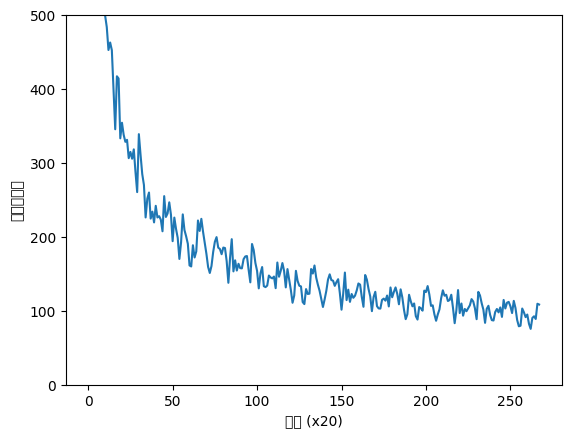

퍼플렉서티 평가 중 ...
234 / 235
테스트 퍼플렉서티:  135.59072463961758


In [17]:
from common.optimizer import SGD
from common.trainer import RnnlmTrainer
from common.util import eval_perplexity
from dataset import ptb



# 하이퍼파라미터 설정
batch_size = 20
wordvec_size = 100
hidden_size = 100  # RNN의 은닉 상태 벡터의 원소 수
time_size = 35     # RNN을 펼치는 크기
lr = 20.0
max_epoch = 4
max_grad = 0.25

# 학습 데이터 읽기
corpus, word_to_id, id_to_word = ptb.load_data('train')
corpus_test, _, _ = ptb.load_data('test')
vocab_size = len(word_to_id)
xs = corpus[:-1]
ts = corpus[1:]

# 모델 생성
model = Rnnlm(vocab_size, wordvec_size, hidden_size)
optimizer = SGD(lr)
trainer = RnnlmTrainer(model, optimizer)

# 기울기 클리핑을 적용하여 학습
trainer.fit(xs, ts, max_epoch, batch_size, time_size, max_grad,
            eval_interval=20)
trainer.plot(ylim=(0, 500))

# 테스트 데이터로 평가
model.reset_state()
ppl_test = eval_perplexity(model, corpus_test)
print('테스트 퍼플렉서티: ', ppl_test)

# 매개변수 저장
model.save_params()

## LSTM 계층 다층화

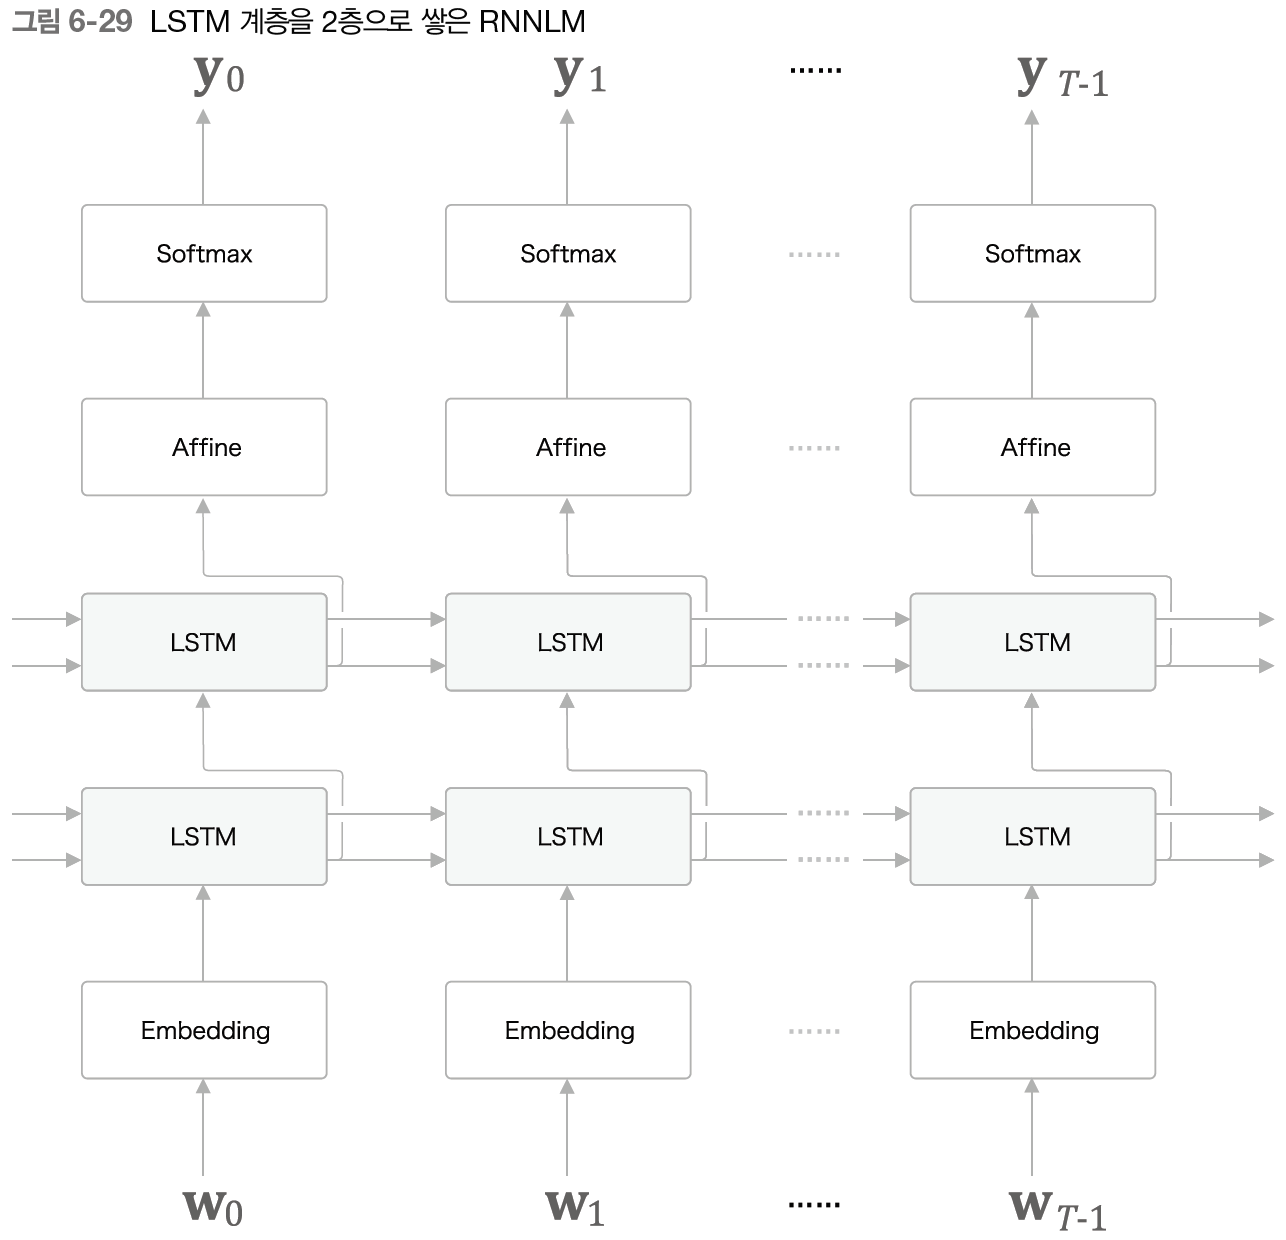

RNNLM으로 정확한 모델을 만들고자 한다면 많은 경우 LSTM 계층을 깊게 쌍하 효과를 볼 수 있다. 지금까지는 1층만 사용했지만 2층, 3층 식으로 여러 겹 쌓으면 언어 모델의 정확도가 향상되리라 기대할 수 있다. LSTM을 2층으로 쌓아 RNNLM 만든다고 하면 위에 그림처럼 된다.

RNN을 사용한 모델에서 드롭아웃 계층을 LSTM 계층의 시계열 방향으로 삽이면 좋은 방법이 아니다.

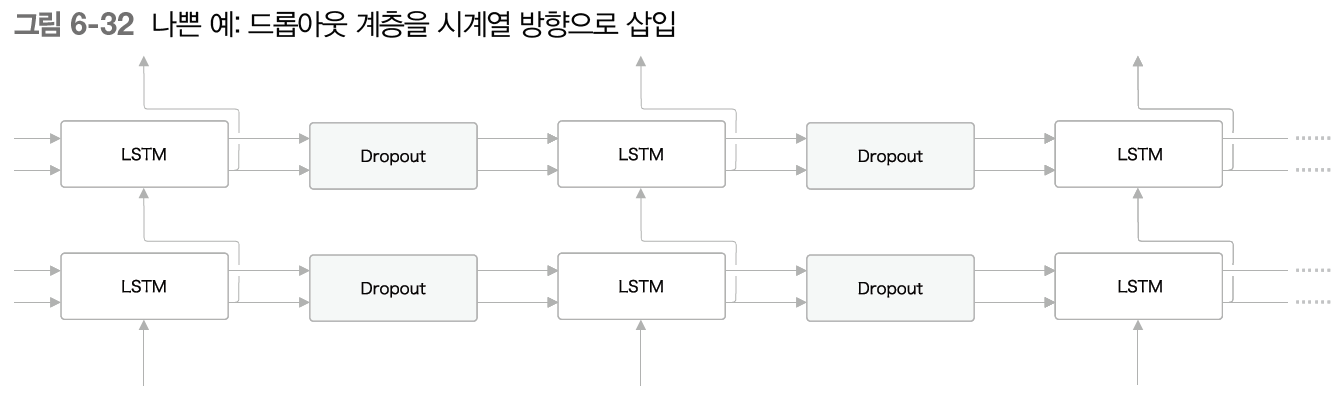

RNN에서 시계열 방향으로 드롭아웃을 학습 시 넣어버리면 시간이 흐름에 따라 정보가 사라질 수 있다. 즉, 흐르는 시간에 비례해 드롭아웃에 의한 노이즈가 축적된다.

드롭아웃 계층을 깊이 방향(상하 방향)으로 삽입하는 방안을 생각해보자


이렇게 구성하면 시간 방향으로 아무리 진행해도 정보를 잃지 않는다. 드롭아웃이 시간축과는 독립적으로 깊이 방향에만 영향을 주는 것이다.

'일반적인 드롭아웃'은 시간 방향에는 적합하지 않다. RNN의 시간 방향 정규화를 목표로 하는 방법이 다양하게 제안되다가 변형 드롭아웃이 제안되어 시간 방향으로 적용하는 데 성공했다.

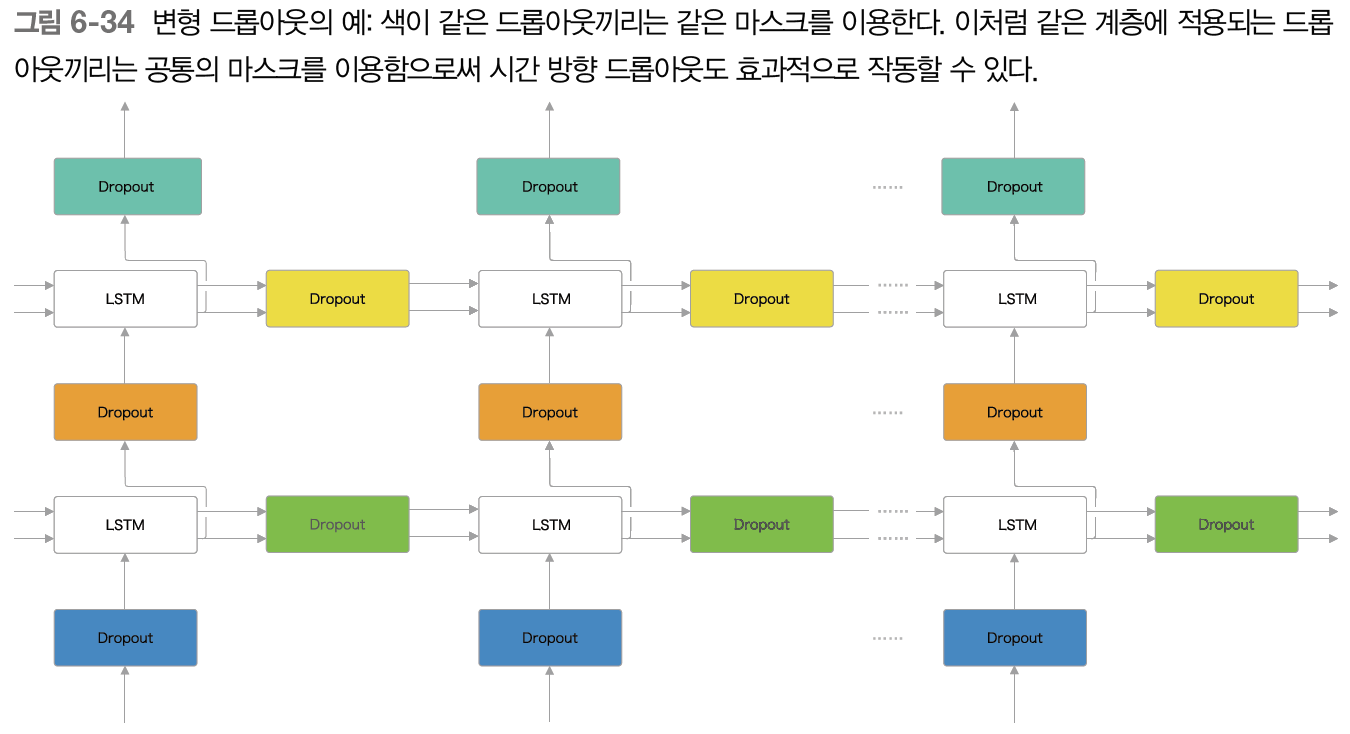

계층의 드롭아웃끼리 마스크를 공유함으로써 마스크가 '고정'된다. 그 겨로가 정보를 잃게 되는 방법도 '고정'되므로, 일반적인 드롭아웃 때와 달리 정보가 지수적으로 손실되는 사태를 피할 수 있다.

## 가중치 공유

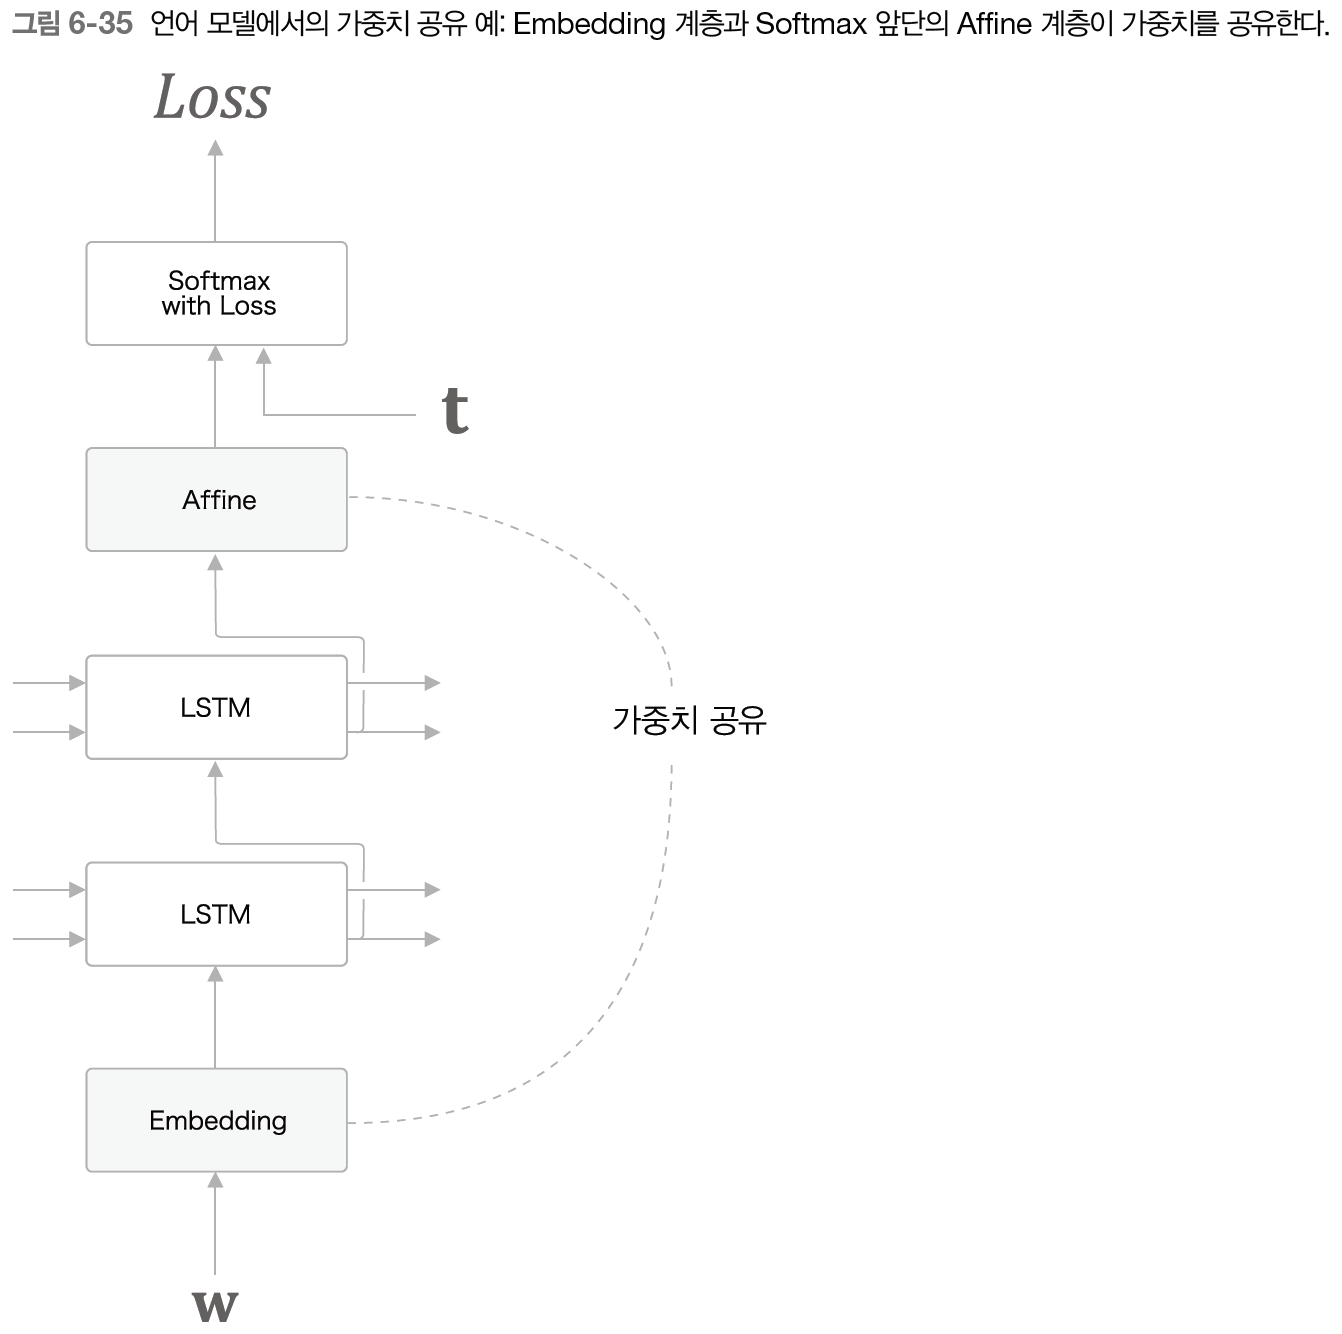

## 개선된 RNNLM 구현

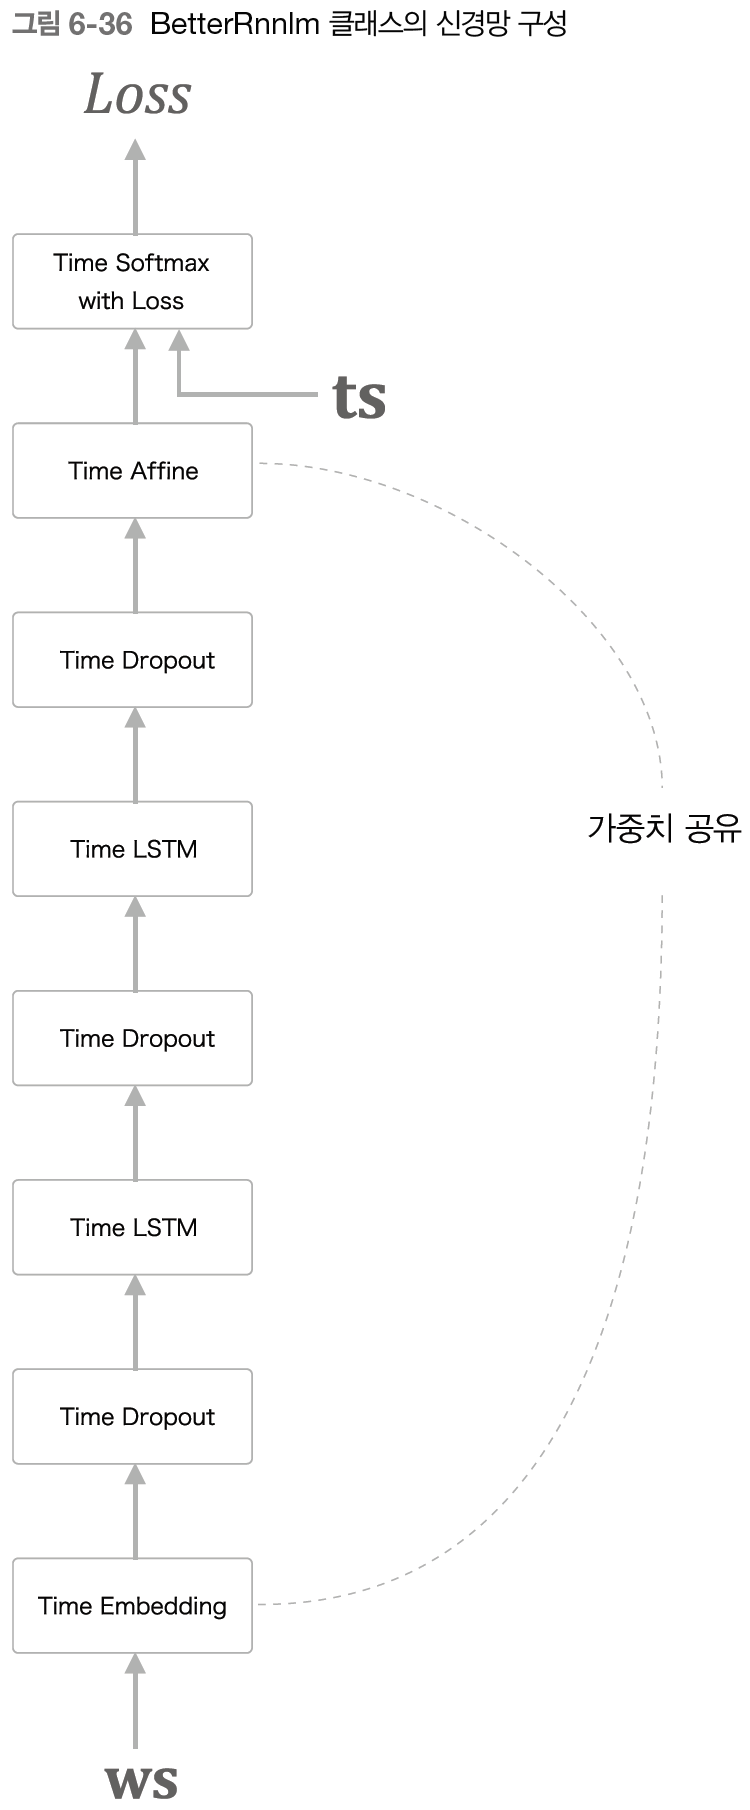


여기서 개선점은 다음 세 가지이다.

LSTM 계층의 다층화(여기에서는 2층)
드롭아웃 사용(깊이 방향으로만 적용)
가중치 공유(Embedding 계층과 Affine 계층에서 가중치 공유)

In [12]:
from common.time_layers import *
from common.np import *  # import numpy as np
from common.base_model import BaseModel


class BetterRnnlm(BaseModel):
    '''
     LSTM 계층을 2개 사용하고 각 층에 드롭아웃을 적용한 모델이다.
     아래 [1]에서 제안한 모델을 기초로 하였고, [2]와 [3]의 가중치 공유(weight tying)를 적용했다.

     [1] Recurrent Neural Network Regularization (https://arxiv.org/abs/1409.2329)
     [2] Using the Output Embedding to Improve Language Models (https://arxiv.org/abs/1608.05859)
     [3] Tying Word Vectors and Word Classifiers (https://arxiv.org/pdf/1611.01462.pdf)
    '''
    def __init__(self, vocab_size=10000, wordvec_size=650,
                 hidden_size=650, dropout_ratio=0.5):
        '''
        초기화 메서드

        Parameters:
        - vocab_size (int): 어휘 사전 크기
        - wordvec_size (int): 단어 임베딩 벡터의 크기
        - hidden_size (int): LSTM 계층의 은닉 상태 크기
        - dropout_ratio (float): 드롭아웃 비율
        '''
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        embed_W = (rn(V, D) / 100).astype('f')
        lstm_Wx1 = (rn(D, 4 * H) / np.sqrt(D)).astype('f')
        lstm_Wh1 = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
        lstm_b1 = np.zeros(4 * H).astype('f')
        lstm_Wx2 = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
        lstm_Wh2 = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
        lstm_b2 = np.zeros(4 * H).astype('f')
        affine_b = np.zeros(V).astype('f')

        self.layers = [
            TimeEmbedding(embed_W),
            TimeDropout(dropout_ratio),
            TimeLSTM(lstm_Wx1, lstm_Wh1, lstm_b1, stateful=True),
            TimeDropout(dropout_ratio),
            TimeLSTM(lstm_Wx2, lstm_Wh2, lstm_b2, stateful=True),
            TimeDropout(dropout_ratio),
            TimeAffine(embed_W.T, affine_b)  # weight tying!!
        ]
        self.loss_layer = TimeSoftmaxWithLoss()
        self.lstm_layers = [self.layers[2], self.layers[4]]
        self.drop_layers = [self.layers[1], self.layers[3], self.layers[5]]

        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads

    def predict(self, xs, train_flg=False):
        '''
        예측 메서드

        Parameters:
        - xs (numpy.ndarray): 입력 데이터
        - train_flg (bool): 훈련 모드 여부

        Returns:
        - numpy.ndarray: 예측 결과
        '''
        for layer in self.drop_layers:
            layer.train_flg = train_flg

        for layer in self.layers:
            xs = layer.forward(xs)
        return xs

    def forward(self, xs, ts, train_flg=True):
        '''
        순전파 메서드

        Parameters:
        - xs (numpy.ndarray): 입력 데이터
        - ts (numpy.ndarray): 정답 데이터
        - train_flg (bool): 훈련 모드 여부

        Returns:
        - float: 손실 값
        '''
        score = self.predict(xs, train_flg)
        loss = self.loss_layer.forward(score, ts)
        return loss

    def backward(self, dout=1):
        '''
        역전파 메서드

        Parameters:
        - dout (float): 손실의 기울기

        Returns:
        - float: 입력 데이터의 기울기
        '''
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

    def reset_state(self):
        '''
        LSTM 계층의 상태 초기화 메서드
        '''
        for layer in self.lstm_layers:
            layer.reset_state()


In [14]:
!pip install cupy

     ---------------------------------------- 0.0/3.4 MB ? eta -:--:--
     ------------------------ --------------- 2.1/3.4 MB 11.7 MB/s eta 0:00:01
     ---------------------------------------- 3.4/3.4 MB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached fastrlock-0.8.2-cp312-cp312-win_amd64.whl.metadata (9.6 kB)
Using cached fastrlock-0.8.2-cp312-cp312-win_amd64.whl (30 kB)
  Running setup.py clean for cupy
Failed to build cupy


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [2827 lines of output]
      Generating cache key from header files...
      Cache key (1610 files matching C:\Users\hopio\AppData\Local\Temp\pip-install-lr3a_whc\cupy_0188972e17284c38b19ddcc6a5a59bba\cupy\_core\include\**): b3e98472a9aa6d57e4d1286ed6c006c548198f43
      Clearing directory: C:\Users\hopio\AppData\Local\Temp\pip-install-lr3a_whc\cupy_0188972e17284c38b19ddcc6a5a59bba\cupy\.data
      Looking for NVTX: C:\Program Files\NVIDIA Corporation\Nsight Systems *\target-windows-x64\nvtx
      Using NVTX at: C:\Program Files\NVIDIA Corporation\Nsight Systems 2023.4.4\target-windows-x64\nvtx
      
      -------- Configuring Module: cuda --------
      a.cpp
      C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v12.4\include\driver_types.h(1327): warning C4819: \xc7\xf6\xc0\xe7 \xc4ڵ\xe5 \xc6\xe4\xc0\xcc\xc1\xf6(949)\xbf\xa1\xbc\xad ǥ\xbd\xc3\xc7\xd2 \xbc\xf6 

In [15]:
import sys
sys.path.append('..')
from common import config
# GPU에서 실행하려면 아래 주석을 해제하세요(CuPy 필요).
# ==============================================
config.GPU = True
# ==============================================
from common.optimizer import SGD
from common.trainer import RnnlmTrainer
from common.util import eval_perplexity, to_gpu
from dataset import ptb


# 하이퍼파라미터 설정
batch_size = 20
wordvec_size = 650
hidden_size = 650
time_size = 35
lr = 20.0
max_epoch = 40
max_grad = 0.25
dropout = 0.5

# 학습 데이터 읽기
corpus, word_to_id, id_to_word = ptb.load_data('train')
corpus_val, _, _ = ptb.load_data('val')
corpus_test, _, _ = ptb.load_data('test')

if config.GPU:
    corpus = to_gpu(corpus)
    corpus_val = to_gpu(corpus_val)
    corpus_test = to_gpu(corpus_test)

vocab_size = len(word_to_id)
xs = corpus[:-1]
ts = corpus[1:]

model = BetterRnnlm(vocab_size, wordvec_size, hidden_size, dropout)
optimizer = SGD(lr)
trainer = RnnlmTrainer(model, optimizer)

best_ppl = float('inf')
for epoch in range(max_epoch):
    trainer.fit(xs, ts, max_epoch=1, batch_size=batch_size,
                time_size=time_size, max_grad=max_grad)

    model.reset_state()
    ppl = eval_perplexity(model, corpus_val)
    print('검증 퍼플렉서티: ', ppl)

    if best_ppl > ppl:
        best_ppl = ppl
        model.save_params()
    else:
        lr /= 4.0
        optimizer.lr = lr

    model.reset_state()
    print('-' * 50)


# 테스트 데이터로 평가
model.reset_state()
ppl_test = eval_perplexity(model, corpus_test)
print('테스트 퍼플렉서티: ', ppl_test)


ModuleNotFoundError: No module named 'cupy'